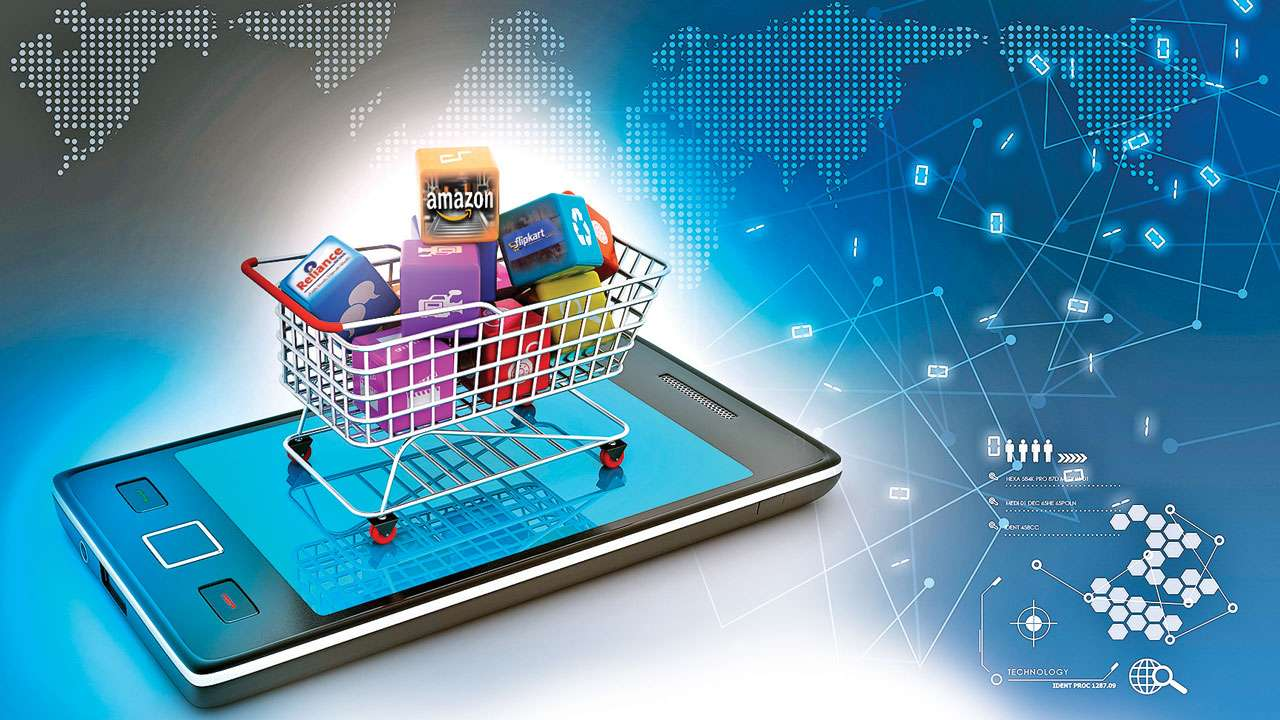




# Project Description

## The Challenge

You are part of a Data Scientists team from the All In One Place company, that needs to determine who are the clients eligible to participate of the “Insiders Program”. With this clients list on hand, the marketing team will a sequency of a custom and exclusive actions for this group, in order to rise the revenues and the purchase frequency. 
As result for this project is expected that you deliver a list with eligible clients to participate of the “Insiders Program”, as well a report answering the following questions:

1. Who are the elegible people to participate in the “Insiders Program”?
2. How many clients will be part of the group?
3. Which are the main caracteristics for the group?
4. Which is the revenues percentage that comes from the group?
5. Which are the expected revenues from this group for the next months?
6. Which are the conditions to a client be eligible for the “Insiders”?
7. Which are the conditions to a client be removed from the “Insiders”?
8. Which are the guarantees that the “Insiders Program” is better than the rest of the base?
9. Which actions the marketing team can perform in order to improve the income?

## The Data

The data set is available on the Kaggle platform, through this link:

https://www.kaggle.com/vik2012kvs/high-value-customers-identification

Each row represents a sell transaction that happened between November 2016 and December 2017. The dataset includes the following informations:

• **Invoice Number:** unique id from each purchase.

• **Stock Code Product:** item code.

• **Description Product:** item name.

• **Quantity:** the quantity of each item purchased per transaction.

• **Invoice Date:** the day that the purchase occurred.

• **Unit Price:** product price per unit.

• **Customer ID:** client id.

• **Country:** the client country.

## Soluction Planning

### IOT Planning

#### Input



1. Businnes Problem
    - Select the high value customers.
    
2. Dataset.
    - Sales in a 1 year period.

#### Output



1. Customers identification for Insiders Program.
    - Insiders Programs Customers list.
    
2. Report.
    - Businnes questions answers. 
    
        1. Who are the elegible people to participate in the “Insiders Program”?
        2. How many clients will be part of the group?
        3. Which are the main caracteristics for the group?
        4. Which is the revenues percentage that comes from the group?
        5. Which are the expected revenues from this group for the next months?
        6. Which are the conditions to a client be eligible for the “Insiders”?
        7. Which are the conditions to a client be removed from the “Insiders”?
        8. Which are the guarantees that the “Insiders Program” is better than the rest of the base?
        9. Which actions the marketing team can perform in order to improve the income?

#### Tasks

1. Who are the elegible people to participate in the “Insiders Program”?
    - What is a "elegible customer" for the businnes?
        - Revenues
            - High AVG Ticket (AVG purchase value)
            - High LTV (Total purchase values)
            - Low recence (how oft the customer make a purchase)
            - High basket size.
            - Low churning probability.
            - High LTV prediction.
            - High propensity to buy.
            
        - Cost
            - Low return rate.
                        
        - Shopping experience
            - High AVG evaluation.
            
            
            
2. How many clients will be part of the group?
    - There is a limit of customer for the Insiders Program?
    - GRoup percentage.
    
    
3. Which are the main caracteristics for the group?
    - Age.
    - Location.
    - See question 1
    
4. Which is the revenues percentage that comes from the group?
    - Total year revenues.
    - Total Insiders group revenues.
    - Comparation.
    
5. Which are the expected revenues from this group for the next months?
    - Insiders group LVT.
    - Cohort analysis - time customer marker.

6. Which are the conditions to a client be eligible for the “Insiders”?
    - Define the model frequency 1, month, 2?, 3?)
    - The customers must to be similar
    
7. Which are the conditions to a client be removed from the “Insiders”?
    - Define the model frequency 1, month, 2?, 3?)
    - The customers must to be dissimilar from insiders.
    
8. Which are the guarantees that the “Insiders Program” is better than the rest of the base?
    - A/B test
    - A/B Beysian test 
    - Hipotesys tests.
9. Which actions the marketing team can perform in order to improve the income?
    - Discount.
    - Buy preference.
    - Free deliver.

#### Benchmark Solutions

1. Desk Research

    1. RFM Model
        - Recency
            - Time since the last purchase.
            - Responsivity.
           
        - Frequency
            - Avg time between transactions.
            - Engagement
            
        - Monetary
            - Total spend, revenues.
            - High value purchases.
            
Step 1
    - Order the groups by a feature.
    
Step 2
    - Divided the customers according to notes.
        - Notes between 1 - 5.
        - 5 groups
        
Step 3
    - Same as step  with other feature.
    
Step 4
    - Do the same with the last feature.
    
Step 5
    - Do the mean between the features scores.
    
    2. RFM Model segmentation
        Categorize customers by the RFM model.

# Imports, Configurations and Helper Functions

## Imports

In [1]:
import dash
import plotly
import random
import warnings
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from pandasql import sqldf
from IPython.display import HTML
from sklearn.manifold import TSNE
from pandas_profiling import ProfileReport
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score, silhouette_samples

## Configurations

In [2]:
warnings.filterwarnings('ignore')

SEED = 43

%matplotlib inline
%pylab inline

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = 18

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.expand_frame_repr', False)

sns.set()

plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot

pd.options.display.float_format = '{:.2f}'.format

Populating the interactive namespace from numpy and matplotlib


## Helper Functions

In [3]:
# Function to plot graphs titles and labels 
def info_plot(title, xlabel, ylabel):
    plt.title(title, fontsize = 18)
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)

# Function to plot values upside the barplot
def annot_plot(plot):
    for p in plot.patches:
        plot.annotate(format(int(p.get_height())), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points',
                       fontsize = 14)
    return None

# Function that plots the silhouette score graphs.
def silhouette_plot(df, model):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df) + (len(np.unique(model.labels_)) + 1) * 10])

    silhouette_avg = silhouette_score(df, model.fit_predict(df))
    print(f"For n_clusters = {len(np.unique(model.labels_))}.\n\nThe average silhouette_score is : {silhouette_avg}.")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, model.fit_predict(df))

    y_lower = 10
    for i in range(len(np.unique(model.labels_))):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / len(np.unique(model.labels_)))
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(model.fit_predict(df).astype(float) / len(np.unique(model.labels_)))
    ax2.scatter(df.values[:, 0], df.values[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = model.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle((f"Silhouette analysis for Mean Shift clustering. (n_clusters = {len(np.unique(model.labels_))})"),fontsize=14, fontweight='bold')

    plt.show()

# Load Data

In [4]:
# Load data
data_path = r'C:\Users\felip\repos\pa005_insiders_clustering\insiders_clustering\data\raw\Ecommerce.csv'

df_init = pd.read_csv(data_path)
df_init.head()

InvoiceNo StockCode                          Description  Quantity InvoiceDate  UnitPrice  CustomerID         Country  Unnamed: 8
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   29-Nov-16       2.55    17850.00  United Kingdom         NaN
1    536365     71053                  WHITE METAL LANTERN         6   29-Nov-16       3.39    17850.00  United Kingdom         NaN
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   29-Nov-16       2.75    17850.00  United Kingdom         NaN
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   29-Nov-16       3.39    17850.00  United Kingdom         NaN
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   29-Nov-16       3.39    17850.00  United Kingdom         NaN

# Data Fist Look

In [5]:
print(f'\nROWS: {df_init.shape[0]}\n\nCOLUMNS: {df_init.shape[1]}.\n')


ROWS: 541909

COLUMNS: 9.



In [6]:
# NaN check

df_init.isna().sum()

# Drop NaN
# df_init.dropna(subset = ['Description', 'CustomerID'])

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Unnamed: 8     541909
dtype: int64

In [7]:
# Data Types 

df_init.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Unnamed: 8     float64
dtype: object

In [8]:
# Descriptive statistics

df_init.describe().T

count     mean     std       min      25%      50%      75%      max
Quantity   541909.00     9.55  218.08 -80995.00     1.00     3.00    10.00 80995.00
UnitPrice  541909.00     4.61   96.76 -11062.06     1.25     2.08     4.13 38970.00
CustomerID 406829.00 15287.69 1713.60  12346.00 13953.00 15152.00 16791.00 18287.00
Unnamed: 8      0.00      NaN     NaN       NaN      NaN      NaN      NaN      NaN

In [9]:
# Pandas Proffiling

report1 = ProfileReport(df_init, 'Insiders Program Dataset Report.')
report1

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## First Look Summary.

<span style="color:blue">1. The columns "Unnamed: 8" have no value to the dataset and should be droped.<span>
    
<span style="color:blue">2. The columns are in a weird order - reorder the columns..<span>
    
<span style="color:blue">3. The column "InvoiceDate" should be "DATE" type.<span>
    
<span style="color:blue">4. The columns "InvoiceNo" should be "INT" type.<span>
    
<span style="color:blue">5. There are some NaN values at the "Description" and "CustomerID".<span>   
    
<span style="color:blue">6. Check for discrepant information and outliers<span>

# Data Cleaning

In [10]:
df_init_2 = df_init.copy()

### <span style="color:blue">1. The columns "Unnamed: 8" have no value to the dataset and should be droped.<span> - DONE

In [11]:
df_init_2.drop(columns = 'Unnamed: 8', inplace = True)

In [12]:
df_init_2.head()

InvoiceNo StockCode                          Description  Quantity InvoiceDate  UnitPrice  CustomerID         Country
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   29-Nov-16       2.55    17850.00  United Kingdom
1    536365     71053                  WHITE METAL LANTERN         6   29-Nov-16       3.39    17850.00  United Kingdom
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   29-Nov-16       2.75    17850.00  United Kingdom
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   29-Nov-16       3.39    17850.00  United Kingdom
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   29-Nov-16       3.39    17850.00  United Kingdom

### <span style="color:blue">2. The columns are in a weird order - reorder the columns.<span> - DONE

In [13]:
df_init_2 = df_init_2[['CustomerID', 'Country', 'InvoiceDate','InvoiceNo', 'Description', 'UnitPrice', 'StockCode', 'Quantity']]
df_init_2.head()

CustomerID         Country InvoiceDate InvoiceNo                          Description  UnitPrice StockCode  Quantity
0    17850.00  United Kingdom   29-Nov-16    536365   WHITE HANGING HEART T-LIGHT HOLDER       2.55    85123A         6
1    17850.00  United Kingdom   29-Nov-16    536365                  WHITE METAL LANTERN       3.39     71053         6
2    17850.00  United Kingdom   29-Nov-16    536365       CREAM CUPID HEARTS COAT HANGER       2.75    84406B         8
3    17850.00  United Kingdom   29-Nov-16    536365  KNITTED UNION FLAG HOT WATER BOTTLE       3.39    84029G         6
4    17850.00  United Kingdom   29-Nov-16    536365       RED WOOLLY HOTTIE WHITE HEART.       3.39    84029E         6

### <span style="color:blue">3. The column "InvoiceDate" should be "DATE" type.<span> - DONE

In [14]:
df_init_2['InvoiceDate'] = pd.to_datetime(df_init_2['InvoiceDate'])

In [15]:
df_init_2.dtypes

CustomerID            float64
Country                object
InvoiceDate    datetime64[ns]
InvoiceNo              object
Description            object
UnitPrice             float64
StockCode              object
Quantity                int64
dtype: object

In [16]:
df_init_2.head()

CustomerID         Country InvoiceDate InvoiceNo                          Description  UnitPrice StockCode  Quantity
0    17850.00  United Kingdom  2016-11-29    536365   WHITE HANGING HEART T-LIGHT HOLDER       2.55    85123A         6
1    17850.00  United Kingdom  2016-11-29    536365                  WHITE METAL LANTERN       3.39     71053         6
2    17850.00  United Kingdom  2016-11-29    536365       CREAM CUPID HEARTS COAT HANGER       2.75    84406B         8
3    17850.00  United Kingdom  2016-11-29    536365  KNITTED UNION FLAG HOT WATER BOTTLE       3.39    84029G         6
4    17850.00  United Kingdom  2016-11-29    536365       RED WOOLLY HOTTIE WHITE HEART.       3.39    84029E         6

### <span style="color:blue">4. The columns "InvoiceNo" should be "INT" type.<span> - DONE
    
    - It was found some codes like "C536379" and it cant be directly tranformed into "INT" type.
    - The "C" before the numbers represents a "Discount" description.
    - It was separated the letter in the code from the numbers and creted a separated column for them - maybe they can be important later.
        - Column "some_code": 
    
        X - there was no letter before the number code.
        [C, A] - The letter code before the number.
    

In [17]:
len(df_init_2[df_init_2['Quantity'] < 0])

10624

In [18]:
print(f'There are {len(df_init_2.set_index("Description").loc["Discount"])} rows with "Discount" InvoiceNo "C" code, and maybe other types of InvoiceNo with letters')

There are 77 rows with "Discount" InvoiceNo "C" code, and maybe other types of InvoiceNo with letters


In [19]:
print(f'There are {len(df_init_2["Description"].unique())} diferent unique products descriptions.')
print(f'There are {len(df_init_2["StockCode"].unique())} diferent unique stock codes.')
print(f'There are {len(df_init_2["InvoiceNo"].unique())} diferent unique Invoice Numbers.')

There are 4224 diferent unique products descriptions.
There are 4070 diferent unique stock codes.
There are 25900 diferent unique Invoice Numbers.


In [20]:
normal = []
not_normal = []

In [21]:
for x in df_init_2['InvoiceNo']:
    if len(x) == 6:
        normal.append(x)
    else:
        not_normal.append(x)

In [22]:
print(f'There are {len(not_normal)} "InvoiceNo" with some letter before the numbers')

There are 9291 "InvoiceNo" with some letter before the numbers


In [23]:
# Created the "SOME_CODE" column, to split the "InvoiceNo" from some code before the numbers.

df_init_2['some_code'] = df_init_2['InvoiceNo'].apply(lambda x: "X" if len(x) == 6 else x[0])

In [24]:
# Separated the code (letter) before some "InvouceNo" from the number itself.

df_init_2['InvoiceNo'] = df_init_2['InvoiceNo'].apply(lambda x: x if len(x) == 6 else x[1:])

In [25]:
df_init_2.sample(5)

CustomerID         Country InvoiceDate InvoiceNo                   Description  UnitPrice StockCode  Quantity some_code
348627         NaN  United Kingdom  2017-09-18    567461  CLASSIC CAFE SUGAR DISPENSER       3.29     23168        10         X
137376    15906.00  United Kingdom  2017-03-27    548158           PANTRY PASTRY BRUSH       1.25     22982         3         X
291875    16880.00  United Kingdom  2017-08-03    562526   GIN + TONIC DIET METAL SIGN       2.55     21175         4         X
239470    12971.00  United Kingdom  2017-06-22    558054  ANTIQUE SILVER T-LIGHT GLASS       1.25     84946        12         X
78559     15311.00  United Kingdom  2017-01-30    542890   LARGE CHINESE STYLE SCISSOR       0.85     16016        10         X

In [26]:
df_init_2['some_code'].value_counts()

X    532618
C      9288
A         3
Name: some_code, dtype: int64

In [27]:
# Tranformed df_init_2['InvoiceNo'] into INTEGER.

df_init_2['InvoiceNo'] = df_init_2['InvoiceNo'].astype(int)

In [28]:
print(f'There are {len(df_init_2[df_init_2["UnitPrice"] < 0])} negative prices at the dataset.')

There are 2 negative prices at the dataset.


In [29]:
print(f'There are {len(df_init_2[df_init_2["Quantity"] < 0])} rows with negative quantity.')

There are 10624 rows with negative quantity.


### <span style="color:blue">5. There are some NaN values at the "Description" and "CustomerID".<span> - DONE
    
    - There are 135080 NaNs at the CustomerID column, almost 25% of all the dataset.
    
    OPTIONS:
    - input an ID for these customers based on the invoice number - each invoice number belongs to a customer.
    
    FINAL DECISION:
    - After some analysis, it was understood that the NaN values at the columns CustomerID and Description are not relevant for the future clustering model training. 
      It was decided to mantein the rows with NaN values.

In [30]:
df_init_2.isna().sum()

CustomerID     135080
Country             0
InvoiceDate         0
InvoiceNo           0
Description      1454
UnitPrice           0
StockCode           0
Quantity            0
some_code           0
dtype: int64

In [31]:
print(f'There are {df_init_2["CustomerID"].isna().sum()} rows with no data at the CustomerID column - ' 
      f'{round(df_init_2["CustomerID"].isna().sum()/len(df_init_2)*100, 2)}% of all dataset.')

There are 135080 rows with no data at the CustomerID column - 24.93% of all dataset.


In [32]:
print(f'There are {len(df_init_2["CustomerID"].unique())} unique customers ID in the dataset.')
print(f'There are {len(df_init_2["InvoiceNo"].unique())} invoice numbers in the dataset.')
print(f'\nThere are {len(df_init_2["InvoiceNo"].unique()) / len(df_init_2["CustomerID"].unique()):.2f} Invoice No for each CustomerID')

There are 4373 unique customers ID in the dataset.
There are 25900 invoice numbers in the dataset.

There are 5.92 Invoice No for each CustomerID


In [33]:
df_customer_NaN = df_init_2.set_index('CustomerID').loc[NaN]
df_customer_NaN.shape

(135080, 8)

In [34]:
df_customer_NaN['InvoiceNo'].value_counts().count()

3710

In [35]:
display(df_init_2.head())
display(df_init_2.tail())

CustomerID         Country InvoiceDate  InvoiceNo                          Description  UnitPrice StockCode  Quantity some_code
0    17850.00  United Kingdom  2016-11-29     536365   WHITE HANGING HEART T-LIGHT HOLDER       2.55    85123A         6         X
1    17850.00  United Kingdom  2016-11-29     536365                  WHITE METAL LANTERN       3.39     71053         6         X
2    17850.00  United Kingdom  2016-11-29     536365       CREAM CUPID HEARTS COAT HANGER       2.75    84406B         8         X
3    17850.00  United Kingdom  2016-11-29     536365  KNITTED UNION FLAG HOT WATER BOTTLE       3.39    84029G         6         X
4    17850.00  United Kingdom  2016-11-29     536365       RED WOOLLY HOTTIE WHITE HEART.       3.39    84029E         6         X

CustomerID Country InvoiceDate  InvoiceNo                      Description  UnitPrice StockCode  Quantity some_code
541904    12680.00  France  2017-12-07     581587      PACK OF 20 SPACEBOY NAPKINS       0.85     22613        12         X
541905    12680.00  France  2017-12-07     581587     CHILDREN'S APRON DOLLY GIRL        2.10     22899         6         X
541906    12680.00  France  2017-12-07     581587    CHILDRENS CUTLERY DOLLY GIRL        4.15     23254         4         X
541907    12680.00  France  2017-12-07     581587  CHILDRENS CUTLERY CIRCUS PARADE       4.15     23255         4         X
541908    12680.00  France  2017-12-07     581587    BAKING SET 9 PIECE RETROSPOT        4.95     22138         3         X

### <span style="color:blue">6. Check for discrepant information and outliers - DONE<span>
    
    - many of the data are not sales themselves, they can be shipping, postage, and other situations that are not sales.
   ~~- 14107 rows were excluded - 2.6% of the dataset.~~
    
    - "Negative quantity" are devolution and should be maintained in the dataset, so we will return them to the dataset.

In [36]:
df_init_2.describe().T

count      mean      std       min       25%       50%       75%       max
CustomerID 406829.00  15287.69  1713.60  12346.00  13953.00  15152.00  16791.00  18287.00
InvoiceNo  541909.00 559946.97 13421.29 536365.00 547896.00 560601.00 571779.00 581587.00
UnitPrice  541909.00      4.61    96.76 -11062.06      1.25      2.08      4.13  38970.00
Quantity   541909.00      9.55   218.08 -80995.00      1.00      3.00     10.00  80995.00

<AxesSubplot:xlabel='UnitPrice'>

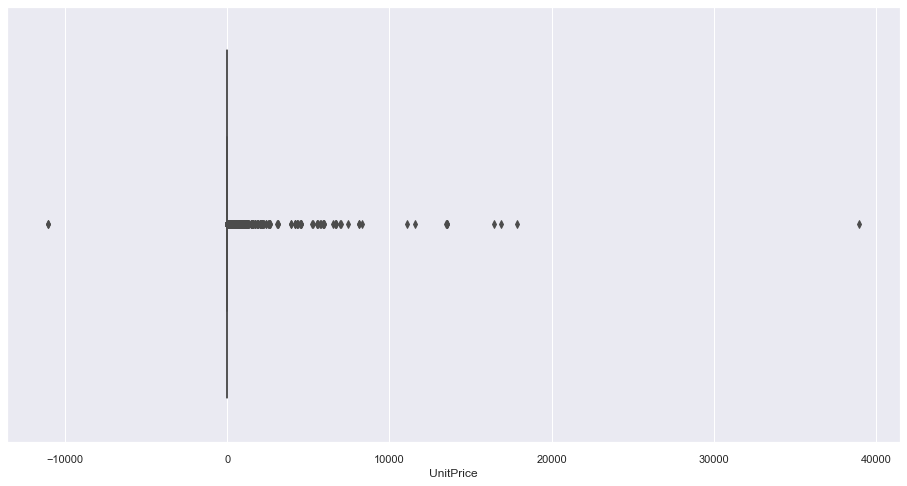

In [37]:
sns.boxplot(df_init_2['UnitPrice'])

In [38]:
print(f'There are {len(df_init_2[df_init_2["UnitPrice"] < 0])} negative prices at the dataset.')

There are 2 negative prices at the dataset.


In [39]:
df_init_2[df_init_2["UnitPrice"] < 0]

CustomerID         Country InvoiceDate  InvoiceNo      Description  UnitPrice StockCode  Quantity some_code
299983         NaN  United Kingdom  2017-08-10     563186  Adjust bad debt  -11062.06         B         1         A
299984         NaN  United Kingdom  2017-08-10     563187  Adjust bad debt  -11062.06         B         1         A

In [40]:
# Seeing the prices = 0

print(f'There are {len(df_init_2[df_init_2["UnitPrice"] == 0])} prices equal to zero at the dataset.')

There are 2515 prices equal to zero at the dataset.


In [41]:
# Excluding negative prices and prices == 0.

df_init_2 = df_init_2[df_init_2["UnitPrice"] > 0]

In [42]:
df_init_2["UnitPrice"].min()

0.001

In [43]:
df_init_2[df_init_2["UnitPrice"] < 0.01]

CustomerID         Country InvoiceDate  InvoiceNo                 Description  UnitPrice     StockCode  Quantity some_code
157195    13952.00  United Kingdom  2017-04-13     550193  PADS TO MATCH ALL CUSHIONS       0.00          PADS         1         X
279045    15618.00  United Kingdom  2017-07-24     561226  PADS TO MATCH ALL CUSHIONS       0.00          PADS         1         X
359871    16198.00  United Kingdom  2017-09-23     568200  PADS TO MATCH ALL CUSHIONS       0.00          PADS         1         X
361741    13405.00  United Kingdom  2017-09-24     568375                Bank Charges       0.00  BANK CHARGES         1         X

In [44]:
# Excluging prices lower them 0.01.

df_init_2 = df_init_2[df_init_2["UnitPrice"] > 0.01]

In [45]:
df_init_2[df_init_2["UnitPrice"] > 10000]

CustomerID         Country InvoiceDate  InvoiceNo      Description  UnitPrice  StockCode  Quantity some_code
15016          NaN  United Kingdom  2016-12-05     537630       AMAZON FEE   13541.33  AMAZONFEE        -1         C
15017          NaN  United Kingdom  2016-12-05     537632       AMAZON FEE   13541.33  AMAZONFEE         1         X
16232          NaN  United Kingdom  2016-12-05     537644       AMAZON FEE   13474.79  AMAZONFEE        -1         C
16356          NaN  United Kingdom  2016-12-05     537651       AMAZON FEE   13541.33  AMAZONFEE        -1         C
43702          NaN  United Kingdom  2017-01-03     540117       AMAZON FEE   16888.02  AMAZONFEE        -1         C
43703          NaN  United Kingdom  2017-01-03     540118       AMAZON FEE   16453.71  AMAZONFEE        -1         C
222681    15098.00  United Kingdom  2017-06-08     556445           Manual   38970.00          M        -1         C
299982         NaN  United Kingdom  2017-08-10     563185  Adjust bad debt   11062.06          B         1         A
524601         NaN  United Kingdom  2017-12-03     580604       AMAZON FEE   11586.50  AMAZONFEE        -1         C
524602         NaN  United Kingdom  2017-12-03     580605       AMAZON FEE   17836.46  AMAZONFEE        -1         C

In [46]:
df_init_2.shape

(539387, 9)

In [47]:
df_init_2[df_init_2['UnitPrice'] > 5000].head()

CustomerID         Country InvoiceDate  InvoiceNo Description  UnitPrice  StockCode  Quantity some_code
15016         NaN  United Kingdom  2016-12-05     537630  AMAZON FEE   13541.33  AMAZONFEE        -1         C
15017         NaN  United Kingdom  2016-12-05     537632  AMAZON FEE   13541.33  AMAZONFEE         1         X
16232         NaN  United Kingdom  2016-12-05     537644  AMAZON FEE   13474.79  AMAZONFEE        -1         C
16313         NaN  United Kingdom  2016-12-05     537647  AMAZON FEE    5519.25  AMAZONFEE        -1         C
16356         NaN  United Kingdom  2016-12-05     537651  AMAZON FEE   13541.33  AMAZONFEE        -1         C

In [48]:
df_init_2.set_index('Description').loc['Manual'].head()

CustomerID         Country InvoiceDate  InvoiceNo  UnitPrice StockCode  Quantity some_code
Description                                                                                            
Manual         16274.00  United Kingdom  2016-11-29     536569       1.25         M         1         X
Manual         16274.00  United Kingdom  2016-11-29     536569      18.95         M         1         X
Manual              NaN  United Kingdom  2016-12-01     536865       2.55         M         1         X
Manual         14723.00  United Kingdom  2016-12-01     536981       0.85         M         2         X
Manual         17062.00  United Kingdom  2016-12-03     537077       0.42         M        12         X

In [49]:
print(f'There are {len(df_init_2.query("Quantity < 0"))} rows at "df_init_2" with negative quantities (devolutions)')

print(f'\nThere are {len(df_init_2.set_index("Description").loc["AMAZON FEE"])} rows that are "AMAZON FEE", they are not sales.')

print(f'\nThere are {len(df_init_2.set_index("Description").loc["POSTAGE"])} rows as "POSTAGE" description and as the Amazon fees, they are not sales.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "DOTCOM POSTAGE"])} "DOTCOM POSTAGE" values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Manual"])} "Manual" values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Adjust bad debt"])} "Adjust bad debt "values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Bank Charges"])} "Bank Charges" values. It can not be included as sale.')

print(f'\nThere was found many products description as "Manual", with diferent prices - total rows: {len(df_init_2.set_index("Description").loc["Manual"])} - it seems to be not normal sales.')

print(f'\nThere was found many products description as "CARRIAGE", with diferent prices - total rows: {len(df_init_2.set_index("Description").loc["CARRIAGE"])} - it are not a sales.')

print(f'\nThere are {len(df_init_2[df_init_2["Description"] == "CRUK Commission"])} rows as "CRUK Commission". It seems to be some kind of commission and are not sales.')

print(f'\n\n"C" some_code: {len(df_init_2.set_index("some_code").loc["C"])}\nQuantity < 0: {len(df_init_2.query("Quantity < 0"))}')
print('\n"C" code represents returns, negative values in the "Quantity" feature.')

There are 9287 rows at "df_init_2" with negative quantities (devolutions)

There are 34 rows that are "AMAZON FEE", they are not sales.

There are 1252 rows as "POSTAGE" description and as the Amazon fees, they are not sales.

It was found 707 "DOTCOM POSTAGE" values. It can not be included as sale.

It was found 566 "Manual" values. It can not be included as sale.

It was found 1 "Adjust bad debt "values. It can not be included as sale.

It was found 36 "Bank Charges" values. It can not be included as sale.

There was found many products description as "Manual", with diferent prices - total rows: 566 - it seems to be not normal sales.

There was found many products description as "CARRIAGE", with diferent prices - total rows: 143 - it are not a sales.

There are 16 rows as "CRUK Commission". It seems to be some kind of commission and are not sales.


"C" some_code: 9287
Quantity < 0: 9287

"C" code represents returns, negative values in the "Quantity" feature.


In [50]:
print(len(df_init_2.set_index("Description").loc["AMAZON FEE"]))
print(len(df_init_2.set_index("Description").loc["POSTAGE"]))
print(len(df_init_2.set_index("Description").loc["Manual"]))
print(len(df_init_2.set_index("Description").loc["Adjust bad debt"]))
print(len(df_init_2.set_index("Description").loc["Bank Charges"]))
print(len(df_init_2.set_index("Description").loc["DOTCOM POSTAGE"]))
print(len(df_init_2.set_index("Description").loc["CARRIAGE"]))
print(len(df_init_2[df_init_2["Description"] == "CRUK Commission"]))

34
1252
566
8
36
707
143
16


In [51]:
# Separating the dataset into 2 datasets - sales and not sales.

df_not_sales = df_init_2.query('Description == ["POSTAGE", "AMAZON FEE", "Manual", "Adjust bad debt", "Bank Charges", "DOTCOM POSTAGE","CARRIAGE","CRUK Commission"]')
df_only_sales = df_init_2.query('Description != ["POSTAGE", "AMAZON FEE", "Manual", "Adjust bad debt", "Bank Charges", "DOTCOM POSTAGE","CARRIAGE", "CRUK Commission"]')

print(df_not_sales.shape)
print(df_only_sales.shape)

(2755, 9)
(536632, 9)


In [52]:
print(f'There are {len(df_only_sales.query("Quantity < 0"))} rows that are products returns at the sales dataset.')

There are 8841 rows that are products returns at the sales dataset.


In [53]:
len(df_only_sales.set_index("some_code").loc["C"])

8841

In [54]:
df_only_sales["some_code"].unique()

array(['X', 'C'], dtype=object)

In [55]:
len(df_only_sales) - len(df_init_2)

-2755

In [56]:
df_only_sales.describe()

CustomerID  InvoiceNo  UnitPrice  Quantity
count   404952.00  536632.00  536632.00 536632.00
mean     15295.18  559968.93       3.30      9.88
std       1710.33   13426.42       5.37    215.93
min      12346.00  536365.00       0.03 -80995.00
25%      13969.00  547903.00       1.25      1.00
50%      15159.00  560694.00       2.08      3.00
75%      16794.00  571828.00       4.13     10.00
max      18287.00  581587.00    1867.86  80995.00

<AxesSubplot:xlabel='UnitPrice'>

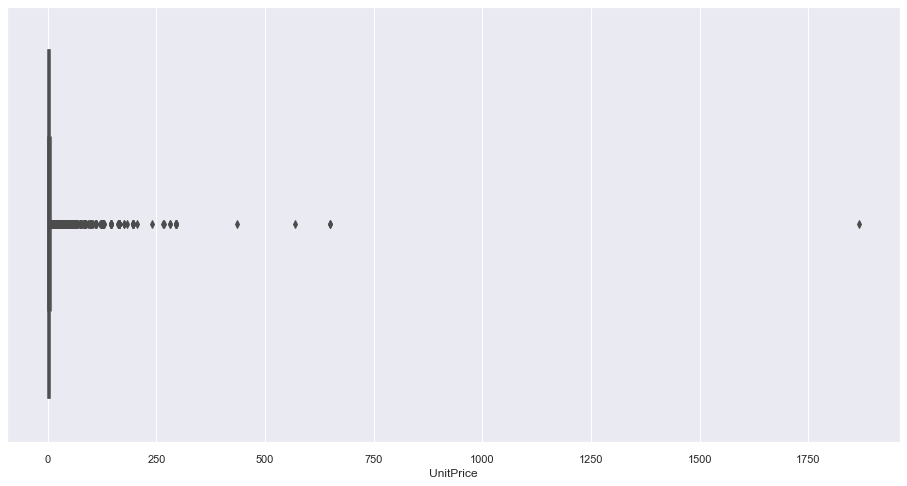

In [57]:
sns.boxplot(df_only_sales["UnitPrice"])

In [58]:
display(df_only_sales.set_index('UnitPrice').loc[df_only_sales["UnitPrice"].max()])
display(df_only_sales.set_index('UnitPrice').loc[df_only_sales["UnitPrice"].min()])

CustomerID                 17940.0
Country             United Kingdom
InvoiceDate    2017-04-06 00:00:00
InvoiceNo                   549452
Description               Discount
StockCode                        D
Quantity                        -1
some_code                        C
Name: 1867.86, dtype: object

CustomerID         Country InvoiceDate  InvoiceNo                          Description StockCode  Quantity some_code
UnitPrice                                                                                                                      
0.03         15838.00  United Kingdom  2016-11-30     536757  ROTATING SILVER ANGELS T-LIGHT HLDR     84347     -9360         C
0.03         12901.00  United Kingdom  2017-05-08     552569                             Discount         D      -240         C

In [59]:
len(df_only_sales.query('Description == ["Discount", "SAMPLES"]'))

139

In [60]:
print(f'Since our first look at the dataset we have excluded {df_init.shape[0] - df_only_sales.shape[0]} rows - {((df_init.shape[0] - df_only_sales.shape[0]) / df_init.shape[0]) * 100:.2f}% of the original dataset.')

Since our first look at the dataset we have excluded 5277 rows - 0.97% of the original dataset.


In [61]:
# Droping duplicate rows
df_only_sales.drop_duplicates(inplace = True)

In [62]:
print(f'After the drop duplicates rows we have removed {df_init.shape[0] - df_only_sales.shape[0]} rows - {((df_init.shape[0] - df_only_sales.shape[0]) / df_init.shape[0]) * 100:.2f}% of the original dataset.')

After the drop duplicates rows we have removed 10536 rows - 1.94% of the original dataset.


In [63]:
print(f'There was {10536 - 5227} duplicated rows at df_only_sales.')

There was 5309 duplicated rows at df_only_sales.


# Feature Engineering

In [64]:
df = df_only_sales.copy()

In [65]:
# Creating YEAR, MONTH and DAY_OF_WEEK Features.

# Year
df['InvoiceYear'] = df['InvoiceDate'].dt.year

# Month
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

# Weekday
df['InvoiceDayWeek'] = df['InvoiceDate'].dt.dayofweek

# Total purchase value
df['TotalValue'] = df['UnitPrice'] * df['Quantity']

df.sample(5)

CustomerID         Country InvoiceDate  InvoiceNo                    Description  UnitPrice StockCode  Quantity some_code  InvoiceYear  InvoiceMonth  InvoiceDayWeek  TotalValue
281180         NaN  United Kingdom  2017-07-25     561515      ELEPHANT, BIRTHDAY CARD,        0.83     21507         1         X         2017             7               1        0.83
295373    16791.00  United Kingdom  2017-08-07     562784   RED RETROSPOT SMALL MILK JUG       2.55     21535         2         X         2017             8               0        5.10
26212     15547.00  United Kingdom  2016-12-10     538507  PHOTO FRAME 3 CLASSIC HANGING       9.95     22796         2         X         2016            12               5       19.90
58189          NaN  United Kingdom  2017-01-12     541221    WOODEN FRAME ANTIQUE WHITE        8.29    82494l         1         X         2017             1               3        8.29
321900    15910.00  United Kingdom  2017-08-30     565209  SILVER HANGING T-LIGHT HOLDER       1.65     84949         2         X         2017             8               2        3.30

In [66]:
# Reordering columns
df = df[['CustomerID',	'Country', 'InvoiceNo', 'InvoiceDate', 'Description', 'StockCode', 'UnitPrice', 'Quantity', 'TotalValue', 'some_code', 'InvoiceYear', 'InvoiceMonth', 'InvoiceDayWeek']]

# Changing "some_code" to "SomeCode"
df.columns = ['CustomerID',	'Country', 'InvoiceNo', 'InvoiceDate', 'Description', 'StockCode', 'UnitPrice', 'Quantity', 'TotalValue', 'SomeCode', 'InvoiceYear', 'InvoiceMonth', 'InvoiceDayWeek']

In [67]:
print(f'First dataset purchase: {df["InvoiceDate"].min()}.')
print(f'Last dataset purchase: {df["InvoiceDate"].max()}.')

First dataset purchase: 2016-11-29 00:00:00.
Last dataset purchase: 2017-12-07 00:00:00.


In [68]:
# Total sales at the first day of the dataset.

len(df.set_index("InvoiceDate").loc[df["InvoiceDate"].min()])

3046

In [69]:
# Total sales at the last day of the dataset.

len(df.set_index("InvoiceDate").loc[df["InvoiceDate"].max()])

1617

## Building RFM Dataframe

In [70]:
# last Invoice Since (days)
# Today - it was used the day after the last date in the dataset.

today = pd.to_datetime('2017-12-08')

df['days_since_last_purchase'] = today - df['InvoiceDate']

# Transforming 'days_since_last_purchase' into iteger.
df['days_since_last_purchase'] = df['days_since_last_purchase'].apply(lambda x: x.days)

# Recency Score
# 5 - last 30 days. 4 - last 60 days. 3 - last 90 days. 2 - last 120 days. 1 - more tham 120 days.
df['recency'] = df['days_since_last_purchase'].apply(lambda x: 5 if x <= 30 else 4 if x > 30 and x <= 60 else 3 if x > 60 and x <= 90 else 2 if x > 90 and x <= 120 else 1)

# Frequency Score
# 5 - > 1000 purchases. 4 - <1000 and > 500 purchases. 3 - <500 and > 200 purchases. 2 - <200 and >100 purchases. 1 <100 purchases.
df['frequency'] = df['CustomerID'].map(dict(df['CustomerID'].value_counts()))
df['frequency'] = df['frequency'].apply(lambda x: 5 if x >= 1000 else 4 if x < 1000 and x >= 500 else 3 if x < 500 and x >= 200 else 2 if x < 200 and x >= 100 else 1)

# Creating a frequency dataframe
df_frequency = pd.DataFrame(df.groupby('CustomerID')['InvoiceNo'].unique())
df_frequency.reset_index(inplace = True)
# Creating a list with the invoice frequency of each customer and create the frequency feature
df_frequency['frequency'] = [len(df_frequency['InvoiceNo'][i]) for i in range(len(df_frequency['InvoiceNo']))]
df_frequency.drop(columns = 'InvoiceNo', inplace = True)


recency = df.groupby('CustomerID')['recency'].max()
#frequency = df.groupby('CustomerID')['frequency'].max() - it was not removing the duplicates
#frequency = df_frequency['frequency'].values
monetary = df.groupby('CustomerID')['TotalValue'].sum()

df_RFM_score = pd.DataFrame([recency, monetary]).T

# creating "monetary_score" feature.
df_RFM_score['monetary_score'] = df_RFM_score['TotalValue'].apply(lambda x: 5 if x >= 10000 else 4 if x < 10000 and x >= 5000 else 3 if x < 5000 and x >= 1000 else 2 if x < 1000 and x >= 500 else 1)
df_RFM_score.drop(columns = 'TotalValue', inplace = True)

# Frequency_score
# Creating frequency_score - not the better way.
df_RFM_score['frequency_score'] = df_frequency['frequency'].values
# Creating scores
df_RFM_score['frequency_score'] = df_RFM_score['frequency_score'].apply(lambda x: 5 if x >= 15 else 4 if x <15 and x >= 10 else 3 if x < 10 and x >= 5 else 2)

# Reset index - Changing columns names
df_RFM_score.reset_index(inplace = True)
df_RFM_score.columns = ['CustomerID', 'recency_score', 'frequency_score', 'monetary_score']

# Converting dtypes as INT. 
df_RFM_score['recency_score'] = df_RFM_score['recency_score'].astype(int)
df_RFM_score['frequency_score'] = df_RFM_score['frequency_score'].astype(int)

# creating "RFM score" feature.
df_RFM_score['RFM_score'] = (df_RFM_score['recency_score'] + df_RFM_score['frequency_score'] + df_RFM_score['monetary_score']) / 3

In [71]:
df_RFM_score.sort_values('RFM_score', ascending = False).head()

CustomerID  recency_score  frequency_score  monetary_score  RFM_score
3733    17428.00              5                5               5       5.00
3916    17675.00              5                5               5       5.00
2324    15498.00              5                5               5       5.00
2791    16133.00              5                5               5       5.00
1058    13767.00              5                5               5       5.00

In [72]:
df_RFM_score['RFM_score'].value_counts()

1.33    862
2.67    654
2.33    462
3.00    446
3.67    402
2.00    386
3.33    371
1.67    291
4.00    205
4.33    116
4.67     93
5.00     74
Name: RFM_score, dtype: int64

## Building grouped dataset by CustomerID

In [73]:
# Groupind original dataset by CustomerID using SQL
df_customer = sqldf('SELECT CustomerID, Country, COUNT(Country) AS total_invoices, SUM(UnitPrice * Quantity) AS total_spend, SUM(Quantity) AS total_itens_purchased FROM df WHERE UnitPrice >= "0" GROUP BY CustomerID;')

# Average spend by invoice
df_customer['Avg_spend_by_invoice'] = df_customer['total_spend'] /  df_customer['total_invoices']

# Droping NaN CustomerID's
df_customer.dropna(inplace = True)

# last purchase since (days)
df_customer['last_purchase_(days)'] = df.groupby('CustomerID')['days_since_last_purchase'].min().values

In [74]:
df_customer.head()

CustomerID         Country  total_invoices  total_spend  total_itens_purchased  Avg_spend_by_invoice  last_purchase_(days)
1    12346.00  United Kingdom               2         0.00                      0                  0.00                   326
2    12347.00         Iceland             182      4310.00                   2458                 23.68                     3
3    12348.00         Finland              27      1437.24                   2332                 53.23                    76
4    12349.00           Italy              72      1457.55                    630                 20.24                    19
5    12350.00          Norway              16       294.40                    196                 18.40                   311

# EDA

### Some Questions:

- What year had relatively the best sales?
    - 2017 has a slight sales advantage over 2016


- Which month was the best for sales?
    - Oktober was the best month, but it is hard to evaluate since we do not have at least 2 full year to have a comparison.


- Which day of is was the best for sales?
    - Wednesday is the best day, either Total sales of average sales by day of week.


- Which season is the best for sales?

- Top 10 product sales by quantity and values.

- Top 10 countryes - with and without England.

- Top 10 cheapest/expensive products.

- Sales proportion by prices.

## Original Dataset

In [75]:
# Pandas Proffiling test

report = ProfileReport(df, 'Insiders Program Dataset Report.')
report

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [76]:
# Saving the report to further use.

local_path = r"C:\Users\felip\repos\pa005_insiders_clustering\insiders_clustering\reports"

report.to_file(output_file = local_path + r'\df_cleaned_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

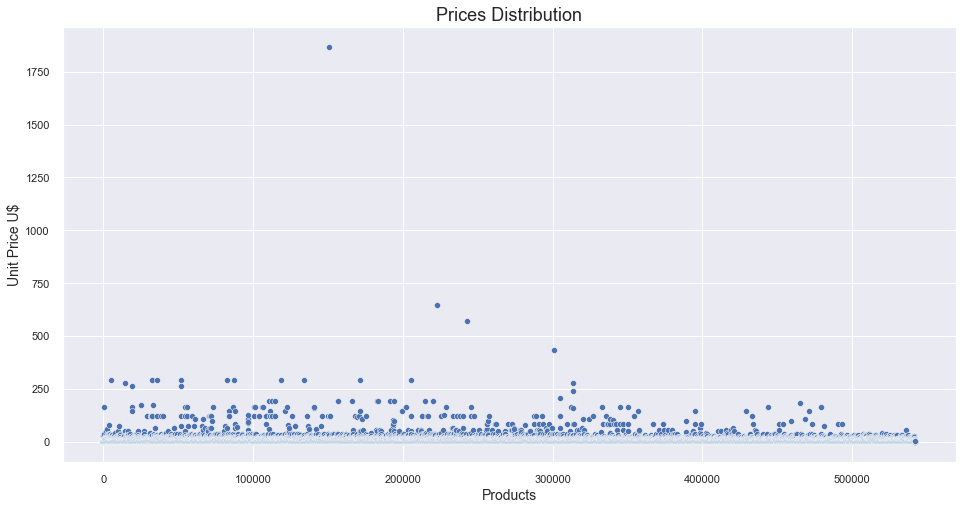

In [77]:
# Prices Distribution.

sns.scatterplot(x = df.index, y = df['UnitPrice'])
plt.title('Prices Distribution', fontsize = 18)
plt.xlabel('Products', fontsize = 14)
plt.ylabel('Unit Price U$', fontsize = 14);

In [78]:
# Grouping Total Invoice values by year to get the mean sale by invoice by year

year_group_mean = df.groupby('InvoiceYear')['TotalValue'].mean()
year_group_mean = pd.DataFrame(year_group_mean)
year_group_mean.reset_index(inplace = True)
year_group_mean

InvoiceYear  TotalValue
0         2016       18.24
1         2017       18.39

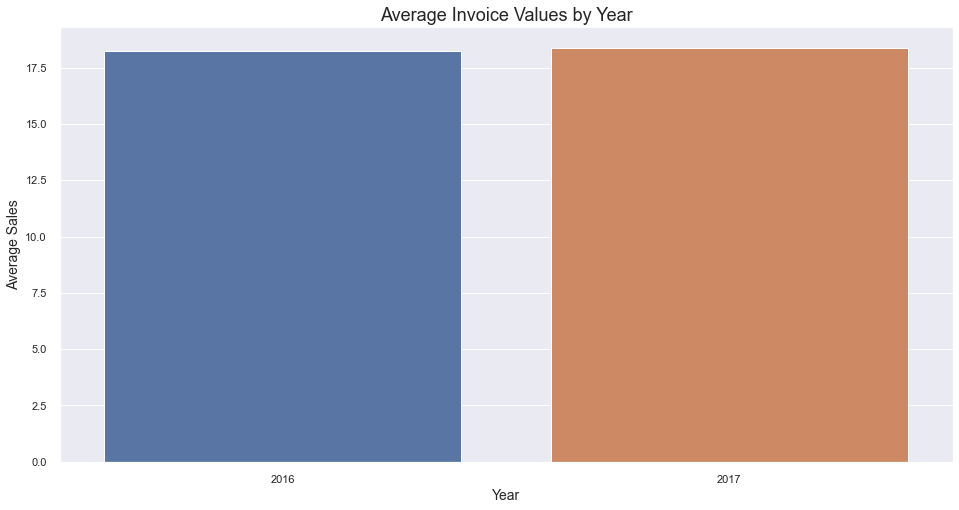

In [79]:
ax = sns.barplot(x = 'InvoiceYear', y = 'TotalValue',data = year_group_mean)
info_plot('Average Invoice Values by Year', 'Year', 'Average Sales')

In [80]:
# Grouping Total Sales by year 

year_group_sum = df.groupby('InvoiceYear')['TotalValue'].sum()
year_group_sum = pd.DataFrame(year_group_sum)
year_group_sum.reset_index(inplace = True)
year_group_sum

InvoiceYear  TotalValue
0         2016   757408.16
1         2017  9005863.24

In [81]:
# Grouping by year and by month

df_byMonth = df.groupby(['InvoiceYear', 'InvoiceMonth'])['TotalValue'].sum()
df_byMonth = pd.DataFrame(df_byMonth)
df_byMonth.reset_index(inplace = True)
df_byMonth

# November 2016 - only 2 days of sales.
# December 2017 - only 7 days of sales.

InvoiceYear  InvoiceMonth  TotalValue
0          2016            11   103172.42
1          2016            12   654235.74
2          2017             1   626790.64
3          2017             2   493100.34
4          2017             3   659973.35
5          2017             4   463459.19
6          2017             5   774809.99
7          2017             6   684479.88
8          2017             7   710797.54
9          2017             8   729272.97
10         2017             9   946244.16
11         2017            10  1122611.09
12         2017            11  1459183.33
13         2017            12   335140.76

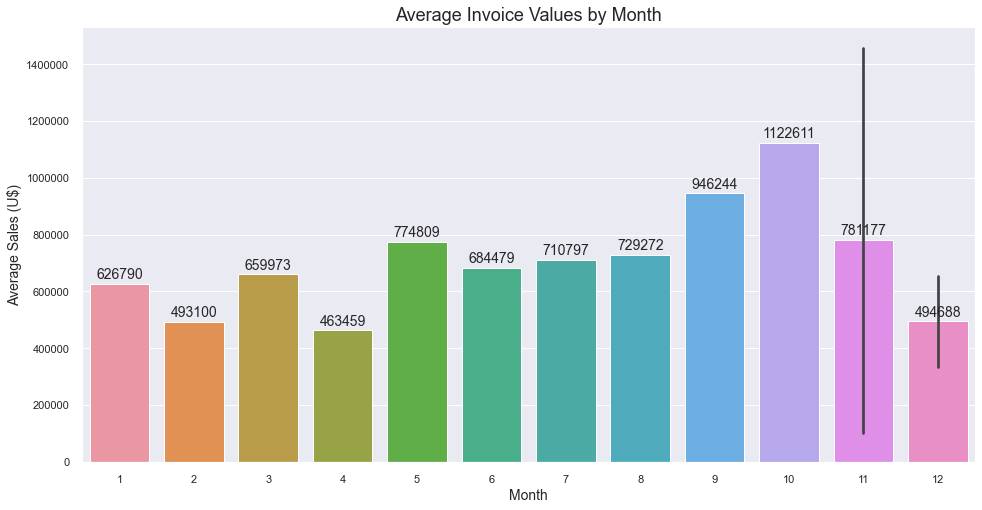

In [82]:
ax = sns.barplot(x = 'InvoiceMonth', y = 'TotalValue',data = df_byMonth)
info_plot('Average Invoice Values by Month', 'Month', 'Average Sales (U$)')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
annot_plot(ax)

In [83]:
# There is no fridays at the dataset.

df['InvoiceDayWeek'].unique()

array([1, 2, 3, 5, 6, 0], dtype=int64)

In [84]:
df['InvoiceDayWeek'].value_counts(sort = False)

0     99908
1     92742
2    102032
3     80528
5     62658
6     93505
Name: InvoiceDayWeek, dtype: int64

In [85]:
# Input Fridays values

friday = [{'InvoiceDayWeek': 4, 'TotalValue': 0, 'AVG_by_day': 0}]
friday = pd.DataFrame(friday)
friday

InvoiceDayWeek  TotalValue  AVG_by_day
0               4           0           0

In [86]:
# groupng by day of week

df_by_DayOfWeek_group = df.groupby('InvoiceDayWeek')['TotalValue'].sum()
df_by_DayOfWeek = pd.DataFrame(df_by_DayOfWeek_group)
df_by_DayOfWeek.reset_index(inplace = True)
df_by_DayOfWeek['AVG_by_day'] = df.groupby('InvoiceDayWeek')['TotalValue'].mean().values

In [87]:
df_by_DayOfWeek = pd.concat([df_by_DayOfWeek, friday], sort = True)
# df_by_DayOfWeek.columns = ['InvoiceDayWeek', 'TotalValue', 'AVG_by_day']
df_by_DayOfWeek.sort_values(by = 'InvoiceDayWeek', inplace = True)

In [88]:
# There is none Fridays at the dataset.

df_by_DayOfWeek.reset_index(inplace = True, drop = True)
df_by_DayOfWeek

AVG_by_day  InvoiceDayWeek  TotalValue
0       19.68               0  1966371.34
1       18.74               1  1737970.68
2       20.38               2  2079089.51
3       19.48               3  1568430.47
4        0.00               4        0.00
5       12.61               5   790332.19
6       17.34               6  1621077.21

In [89]:
df_by_DayOfWeek_group2 = df.groupby(['InvoiceDate', 'InvoiceDayWeek'])['TotalValue'].sum()
df_by_DayOfWeek2 = pd.DataFrame(df_by_DayOfWeek_group2)
df_by_DayOfWeek2.reset_index(inplace = True)

In [90]:
df_by_DayOfWeek2.head()

InvoiceDate  InvoiceDayWeek  TotalValue
0  2016-11-29               1    57117.10
1  2016-11-30               2    46055.32
2  2016-12-01               3    43465.65
3  2016-12-03               5    30517.67
4  2016-12-04               6    50701.25

In [91]:
# Finding mean sales by day of week

df_by_DayOfWeek_group3 = df_by_DayOfWeek2.groupby('InvoiceDayWeek')['TotalValue'].mean()
df_by_DayOfWeek3 = pd.DataFrame(df_by_DayOfWeek_group3)
df_by_DayOfWeek3.reset_index(inplace = True)
df_by_DayOfWeek3 = pd.concat([df_by_DayOfWeek3, friday], sort = True)
df_by_DayOfWeek3.drop(columns = 'AVG_by_day', inplace = True)
df_by_DayOfWeek3.sort_values(by = 'InvoiceDayWeek', inplace = True)

In [92]:
df_by_DayOfWeek3.columns = ['InvoiceDayWeek', 'AVG_by_day']
df_by_DayOfWeek3

InvoiceDayWeek  AVG_by_day
0               0    37814.83
1               1    32791.90
2               2    39228.10
3               3    31368.61
0               4        0.00
4               5    15806.64
5               6    34491.00

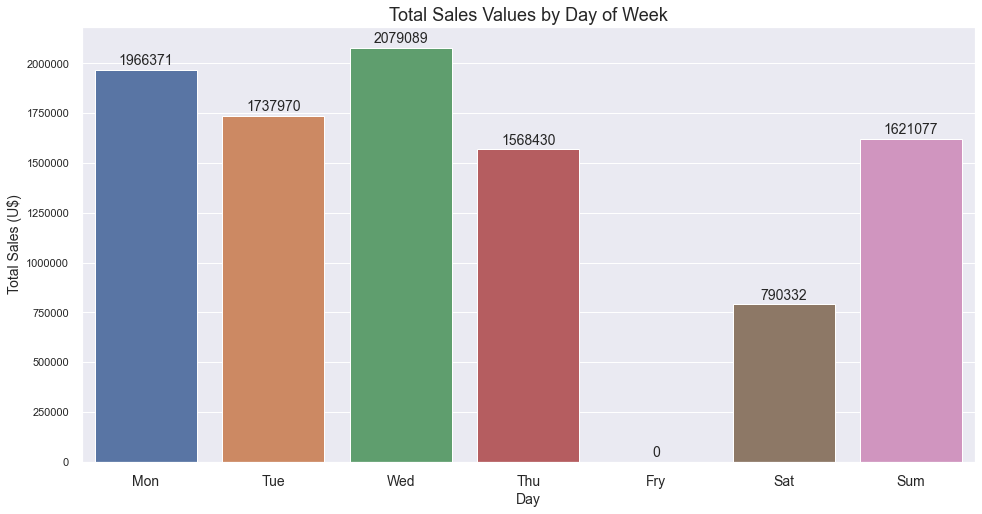

In [93]:
ax1 = sns.barplot(x = df_by_DayOfWeek['InvoiceDayWeek'], y = df_by_DayOfWeek['TotalValue'])
info_plot('Total Sales Values by Day of Week', 'Day', 'Total Sales (U$)')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fry', 'Sat', 'Sum'], fontsize = 14)
annot_plot(ax1)

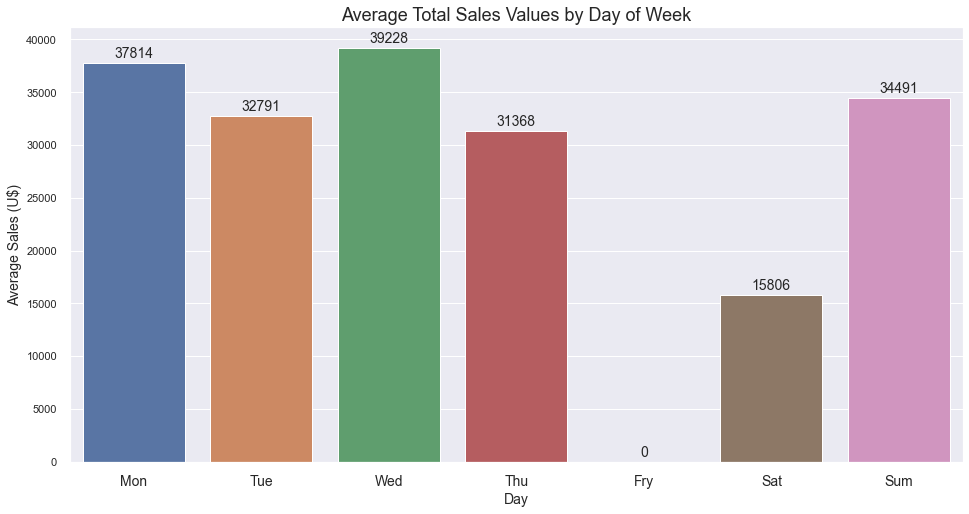

In [94]:
ax2 = sns.barplot(x = df_by_DayOfWeek3['InvoiceDayWeek'], y = df_by_DayOfWeek3['AVG_by_day'])
info_plot('Average Total Sales Values by Day of Week', 'Day', 'Average Sales (U$)')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fry', 'Sat', 'Sum'], fontsize = 14)
annot_plot(ax2)

## Customer ID dataset

In [95]:
customer_report = ProfileReport(df_customer, 'Insiders Program Customer Dataset Report.')
customer_report

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [96]:
# Saving the report to further use.

report.to_file(output_file = local_path + r'\df_customer_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

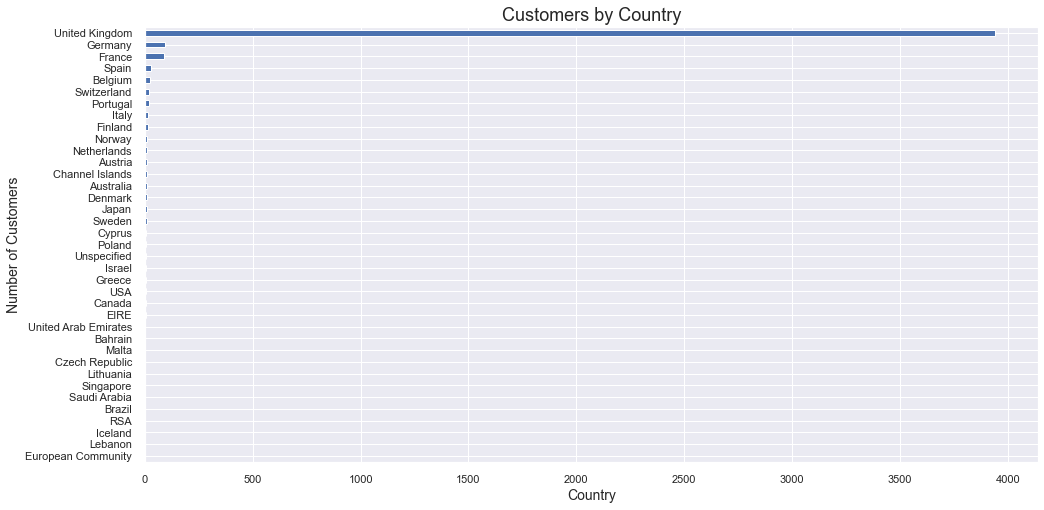

In [97]:
ax = df_customer.groupby('Country')['Country'].count().sort_values().plot(kind = 'barh')
info_plot('Customers by Country', 'Country', 'Number of Customers')
ax;

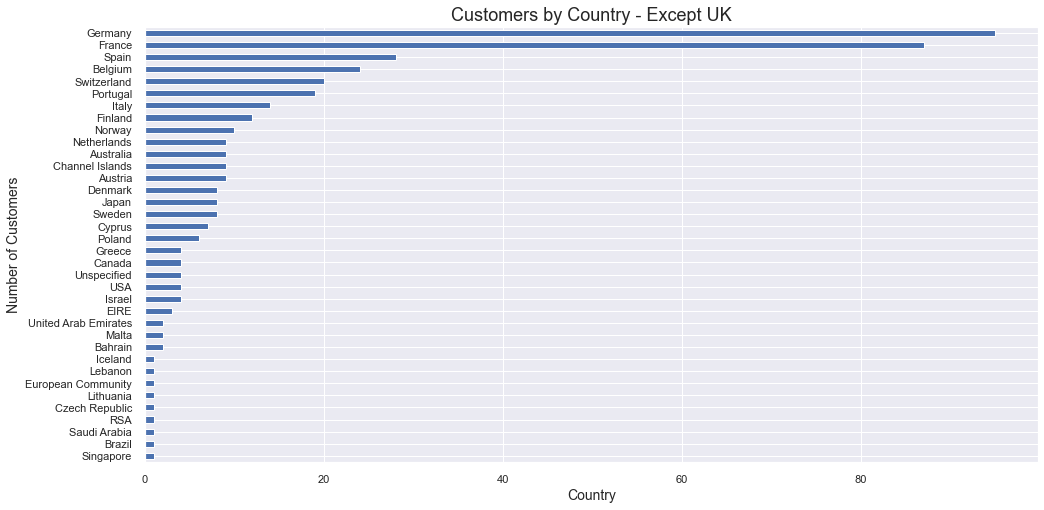

In [98]:
# Country with more customers - Except UK
df_customer_noUK = df_customer.query("Country != 'United Kingdom'")
df_customer_noUK.groupby('Country')['Country'].count().sort_values().plot(kind = 'barh')
info_plot('Customers by Country - Except UK', 'Country', 'Number of Customers');


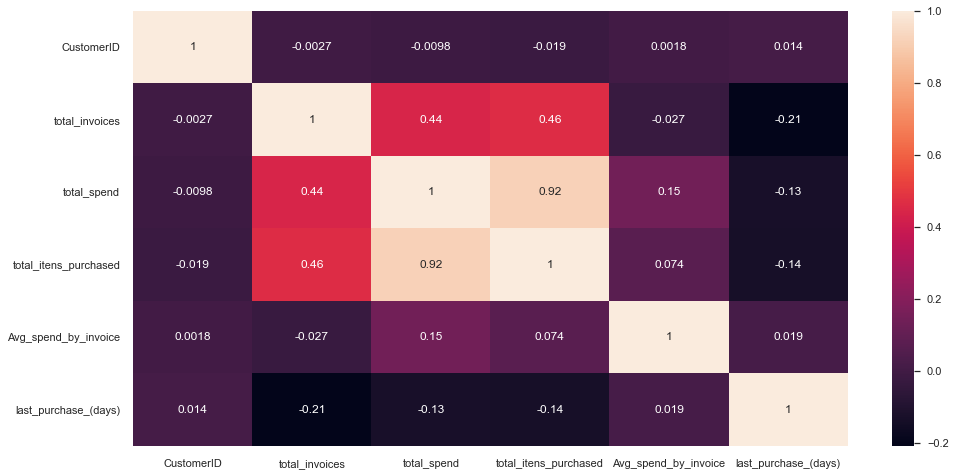

In [99]:
# Correlation

corr = df_customer.corr()
sns.heatmap(corr, annot = True);

# Data Preparation

In [100]:
df_customer_2 = df_customer.copy()
df_customer_2.head()

CustomerID         Country  total_invoices  total_spend  total_itens_purchased  Avg_spend_by_invoice  last_purchase_(days)
1    12346.00  United Kingdom               2         0.00                      0                  0.00                   326
2    12347.00         Iceland             182      4310.00                   2458                 23.68                     3
3    12348.00         Finland              27      1437.24                   2332                 53.23                    76
4    12349.00           Italy              72      1457.55                    630                 20.24                    19
5    12350.00          Norway              16       294.40                    196                 18.40                   311

In [101]:
# Droping categorical features
df_customer_2.drop(columns = ['CustomerID', 'Country'],inplace = True)

In [102]:
# Standard Scaler

scaler = StandardScaler()
df_customer_scaled = scaler.fit_transform(df_customer_2)

df_customer_scaled = pd.DataFrame(columns=[df_customer_2.columns], data=df_customer_scaled)

# Feature Selection

# Hyperparameter Fine-Tunning

In [103]:
df_HP = df_RFM_score.copy()
df_HP.drop(columns =['CustomerID', 'RFM_score'], inplace = True)

In [104]:
df_HP.head()

recency_score  frequency_score  monetary_score
0              1                1               2
1              5                3               3
2              3                3               2
3              5                3               2
4              1                1               2

## Within Cluster Sum of Square - WSS

    - WSS does not take into account the distance between clusters

### Roth method

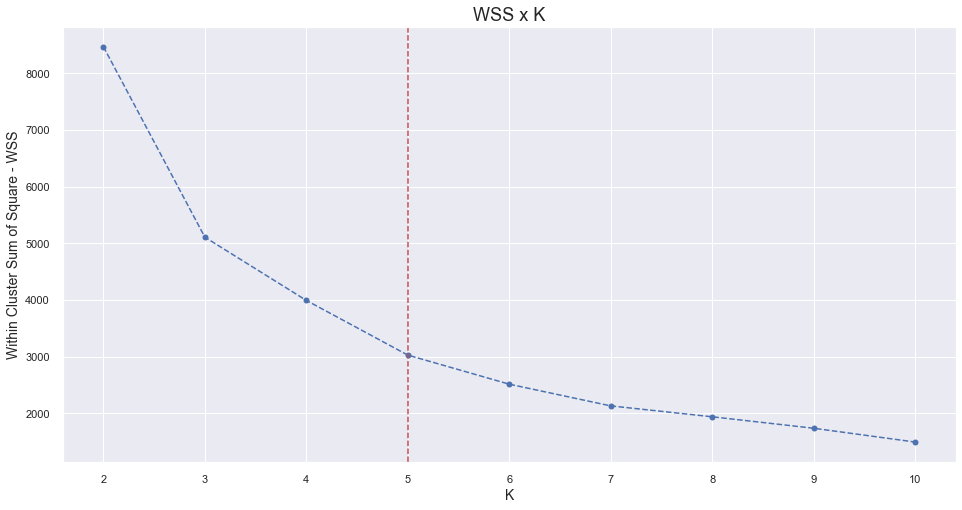

In [105]:
# Find best K.

clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
wss = []

for k in clusters:
    # model definition
    kmeans = KMeans(init = 'random', n_clusters = k, n_init = 10, max_iter = 300, random_state = 42)
    
    # Model Training
    kmeans.fit(df_HP)
    
    # Validation
    wss.append(kmeans.inertia_)
    
# Plot    
plt.plot(clusters, wss, linestyle = '--', marker = 'o', color = 'b')
plt.title('WSS x K', fontsize = 18)
plt.ylabel('Within Cluster Sum of Square - WSS', fontsize = 14)
plt.xlabel('K', fontsize = 14)
plt.axvline(5, linestyle = '--', color = 'r');

### Yellow-Brick method

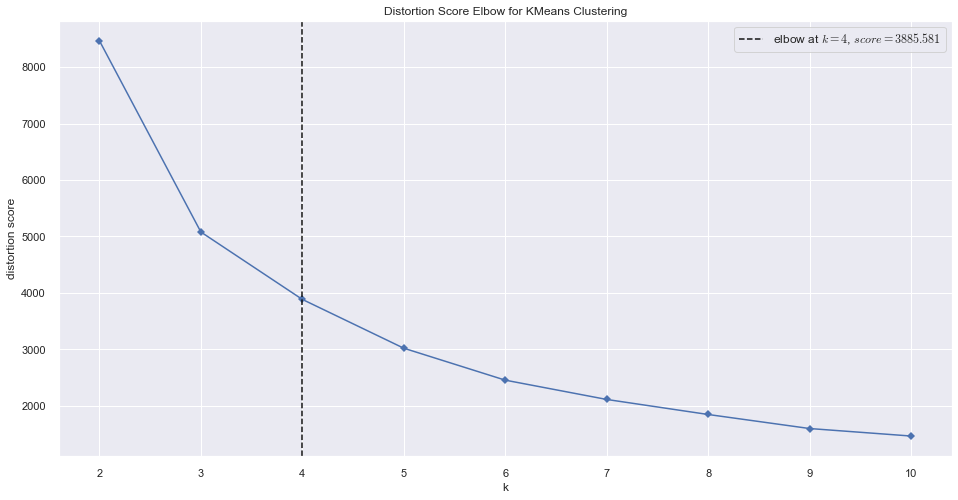

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [106]:
kmeans2 = KElbowVisualizer(KMeans(), k = clusters, timings = False)
kmeans2.fit(df_HP)
kmeans2.show()

## Silhouette Score

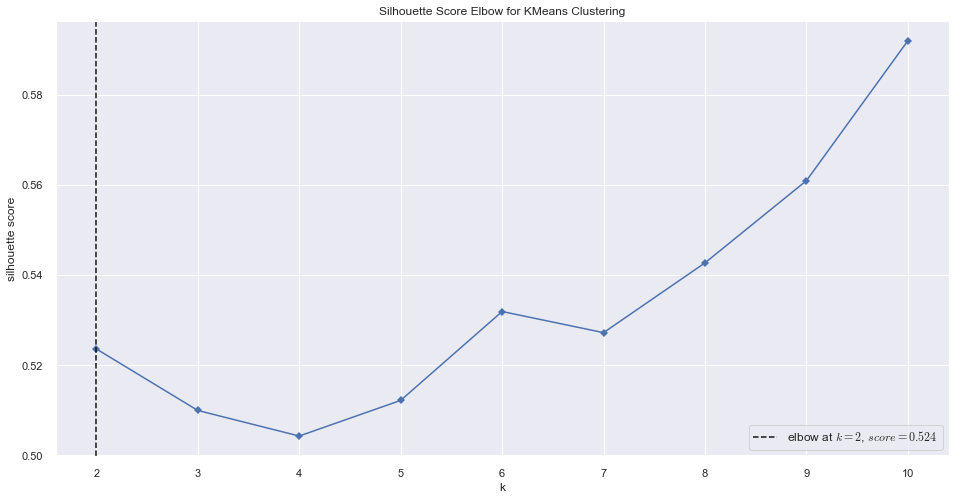

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [107]:
kmeans2 = KElbowVisualizer(KMeans(), k = clusters, metric = 'silhouette', timings = False)
kmeans2.fit(df_HP)
kmeans2.show()

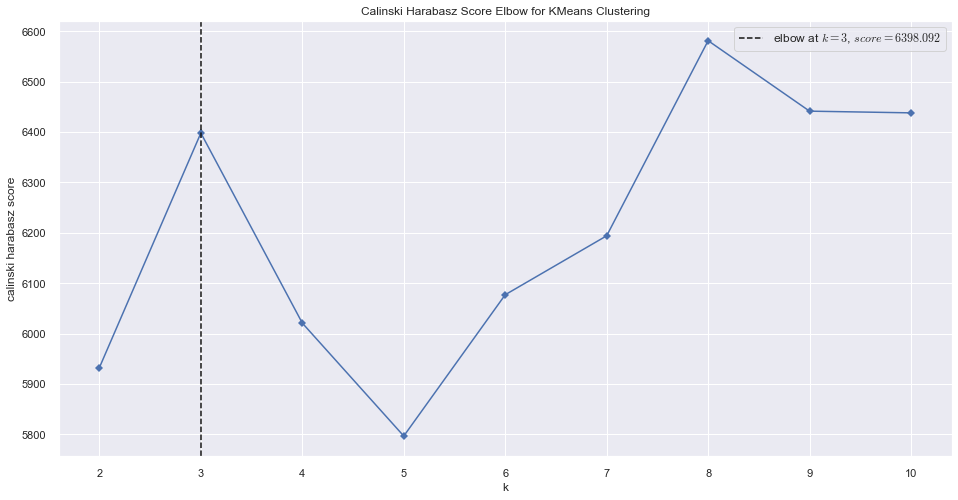

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [108]:
kmeans2 = KElbowVisualizer(KMeans(), k = clusters, metric = 'calinski_harabasz', timings = False)
kmeans2.fit(df_HP)
kmeans2.show()

In [109]:
kmeans.labels_

array([1, 2, 7, ..., 5, 6, 4])

df.head()

# Models Tests

## RFM Dataset.

### "Manual" Clustering - RFM dataset.

In [110]:
# Manually clustering the df_RFM dataset - clients with RFM Score upper than 4 are abble to be at the "Insiders Program"

df_insider_RFM = df_RFM_score[df_RFM_score['RFM_score'] >= 4]
df_insider_RFM.reset_index(inplace = True, drop = True)
print(f'Accordingly with the "manual" clustering, {(df_insider_RFM.shape[0] / df_RFM_score.shape[0]) * 100:.2f}% of the clients are elegible to the "Insiders Program".')

Accordingly with the "manual" clustering, 11.19% of the clients are elegible to the "Insiders Program".


### RFM Feature Selection

In [111]:
df_RFM = df_RFM_score.drop(columns = ['CustomerID', 'RFM_score'])
df_RFM.head()

recency_score  frequency_score  monetary_score
0              1                1               2
1              5                3               3
2              3                3               2
3              5                3               2
4              1                1               2

### KMeans - df_RFM

In [112]:
# Instancing model

k = 2

RFM_Kmeans = KMeans(n_clusters = k)
RFM_Kmeans.fit(df_RFM)
labels = RFM_Kmeans.labels_

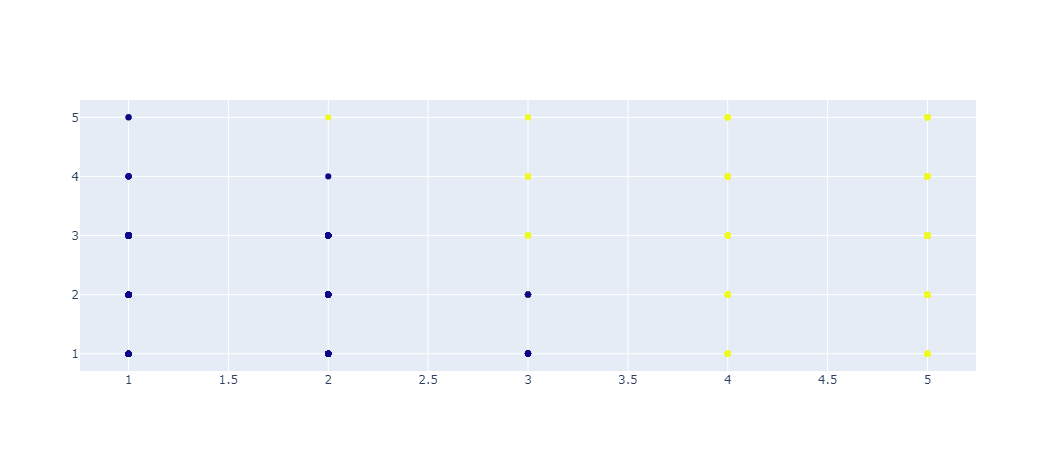

In [113]:
# RFM KMeans clustering - 2D plot - 2 clusters

fig = go.Figure()
fig.add_trace(go.Scatter(x = df_RFM['recency_score'], y = df_RFM['frequency_score'], mode = 'markers',
                         marker = dict(color = RFM_Kmeans.labels_.astype(np.float)), text = labels))

fig.show()

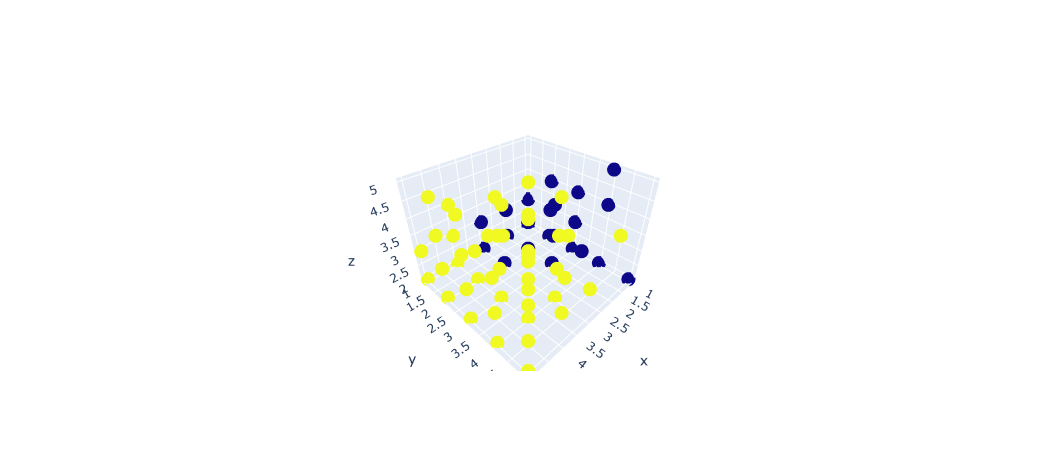

In [114]:
# RFM KMeans clustering - 3D plot - 2 clusters

fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df_RFM['recency_score'], y = df_RFM['frequency_score'], z = df_RFM['monetary_score'],
                          mode = 'markers', marker = dict(color = labels.astype(np.float)),
                          text = labels))

fig.show()

#### RFM - KMeans metrics - Silouette Score

In [115]:
k_clusters = [i for i in range(2, 10)]

silhouette_score_values = []
silhouette_score_values2 = []

for k in k_clusters:
    RFM_Kmeans = KMeans(n_clusters = k)
    labels = RFM_Kmeans.fit_predict(df_RFM)
    silhouette_score_values.append(silhouette_score(df_RFM, labels))
    silhouette_score_values2.append([k, silhouette_score(df_RFM, labels)])

In [116]:
SC = pd.DataFrame(silhouette_score_values2, columns = ['K', 'silhouette_score'])
SC.style.highlight_max(color = 'darkorange')

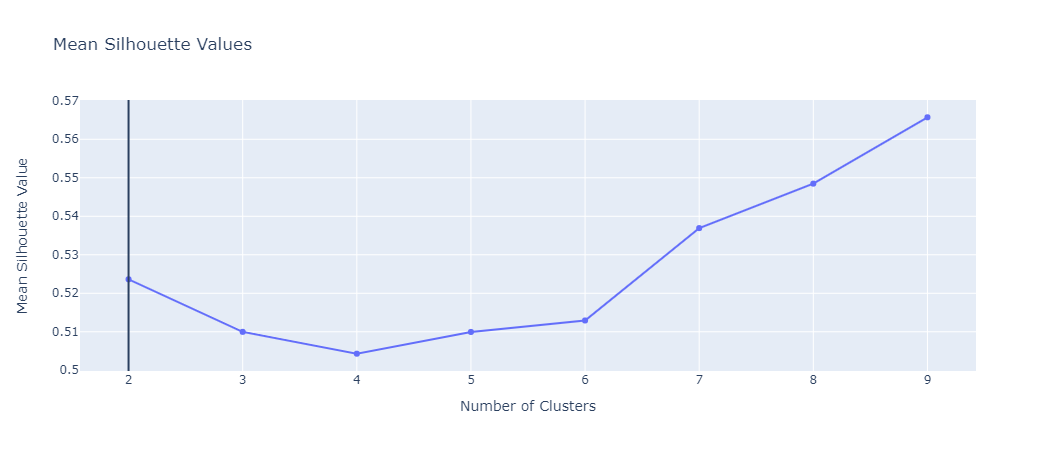

In [117]:
fig  = go.Figure()
fig.add_trace(go.Scatter(x = k_clusters, y = silhouette_score_values))

fig.update_layout(title = 'Mean Silhouette Values', xaxis_title = 'Number of Clusters', yaxis_title = 'Mean Silhouette Value')
fig.add_vline(x = 2)

fig.show()

Accordingly to Silhouette Score metric, a higher Silhouette Coefficient score relates to a model with better defined clusters. The more closer to 1, the better. The best k for the RFM dataset is 2 or more then 6 clusters.

#### RFM - KMeans metrics - Davies-Bouldin Index

In [118]:
k_clusters = [i for i in range(2, 10)]

davies_bouldin = []
davies_bouldin2 = []

for k in k_clusters:
    RFM_Kmeans = KMeans(n_clusters = k)
    labels = RFM_Kmeans.fit_predict(df_RFM)
    davies_bouldin.append(davies_bouldin_score(df_RFM, labels))
    davies_bouldin2.append([k, davies_bouldin_score(df_RFM, labels)])

In [119]:
DBI = pd.DataFrame(davies_bouldin2, columns = ['K', 'davies_bouldin_index'])
DBI.style.highlight_min(color = 'green')

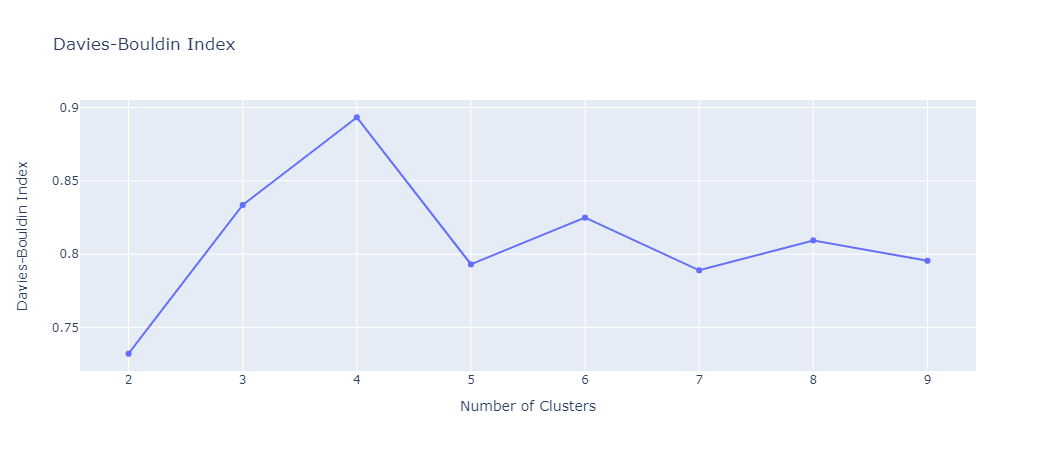

In [120]:
fig  = go.Figure()
fig.add_trace(go.Scatter(x = k_clusters, y = davies_bouldin))

fig.update_layout(title = 'Davies-Bouldin Index', xaxis_title = 'Number of Clusters', yaxis_title = 'Davies-Bouldin Index')
#fig.add_vline(x = 2)

fig.show()

Accordingly to Davies Bouldin Index metric, a lower Davies-Bouldin index reports to a model with better separation between the clusters. The more the score is closer to 0 (minimum), better. The best k for the RFM dataset is 2 or 9 clusters.

#### RFM - KMeans metrics - Calinski Harabasz Index

In [121]:
k_clusters = [i for i in range(2, 10)]

calinski_harabasz = []
calinski_harabasz2 = []

for k in k_clusters:
    RFM_Kmeans = KMeans(n_clusters = k)
    labels = RFM_Kmeans.fit_predict(df_RFM)
    calinski_harabasz.append(calinski_harabasz_score(df_RFM, labels))
    calinski_harabasz2.append([k, calinski_harabasz_score(df_RFM, labels)])

In [122]:
CHI = pd.DataFrame(calinski_harabasz2, columns = ['K', 'calinski_harabasz_index'])
CHI.style.highlight_max(color = 'orange')

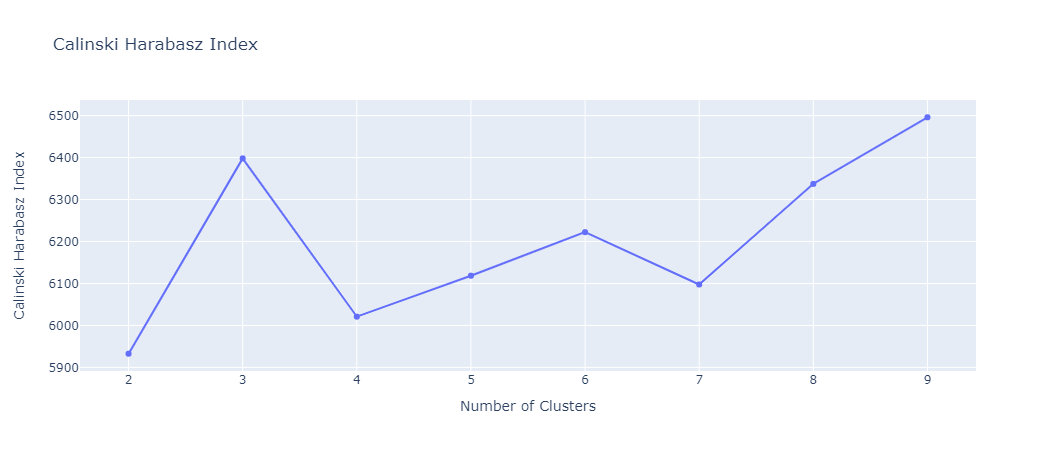

In [123]:
fig  = go.Figure()
fig.add_trace(go.Scatter(x = k_clusters, y = calinski_harabasz))

fig.update_layout(title = 'Calinski Harabasz Index', xaxis_title = 'Number of Clusters', yaxis_title = 'Calinski Harabasz Index')
#fig.add_vline(x = 2)

fig.show()

Accondingly with Calinski Harabasz Index, a higher Calinski-Harabasz score relates to a model with better defined clusters. The best K for the RFM dataset KMeans model is 3.

#### RFM KMeans Final Evaluation

    - Accordingly to the Silhouette Score, Davies Bouldin Index and Calisnki Harabasz Index, the best n_clusters number for the RFM dataset KMeans custerization is 2 or 3.

In [124]:
KMeans_final = pd.merge(SC, DBI, how = 'left', on = 'K')
KMeans_final = pd.merge(KMeans_final, CHI, how = 'left', on = 'K')
KMeans_final

# Silhouette Score - More closer to 1 better.
# Davies Bouldin - More close to zero better.
# Calisnki Harabasz - The bigger, the better.

K  silhouette_score  davies_bouldin_index  calinski_harabasz_index
0  2              0.52                  0.73                  5932.68
1  3              0.51                  0.83                  6398.09
2  4              0.50                  0.89                  6020.95
3  5              0.51                  0.79                  6118.51
4  6              0.51                  0.82                  6222.28
5  7              0.54                  0.79                  6097.59
6  8              0.55                  0.81                  6337.25
7  9              0.57                  0.80                  6495.98

In [125]:
df_KMeans_metrics_K2 = KMeans_final.iloc[0]
df_KMeans_metrics_K2 = pd.DataFrame(df_KMeans_metrics_K2).T
df_KMeans_metrics_K2.drop(columns = 'K', inplace = True)
df_KMeans_metrics_K2['Algorithm'] = 'KMeans (k = 2)'
df_KMeans_metrics_K2 = df_KMeans_metrics_K2[['Algorithm', 'silhouette_score',	'davies_bouldin_index',	'calinski_harabasz_index']]
df_KMeans_metrics_K2

Algorithm  silhouette_score  davies_bouldin_index  calinski_harabasz_index
0  KMeans (k = 2)              0.52                  0.73                  5932.68

### DBSCAN - df_RFM

In [126]:
RFM_DBSCAN = DBSCAN(eps = 1, min_samples = 100, metric = 'manhattan')

RFM_DBSCAN.fit(df_RFM)
DB_labels = RFM_DBSCAN.labels_

In [127]:
print(f'The DBSCAN Algorithm with default parameters clustered the dataset into {len(np.unique(DB_labels))} clusters.')

The DBSCAN Algorithm with default parameters clustered the dataset into 2 clusters.


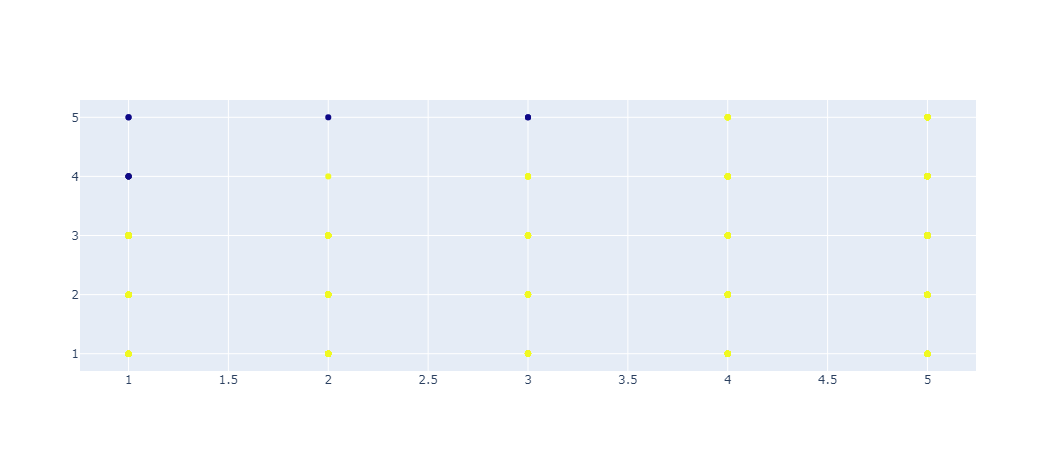

In [128]:
# RFM DBSCAN clustering - 2D plot

fig = go.Figure()
fig.add_trace(go.Scatter(x = df_RFM['recency_score'], y = df_RFM['frequency_score'], mode = 'markers',
                         marker = dict(color = RFM_DBSCAN.labels_.astype(np.float)), text = DB_labels))

fig.show()

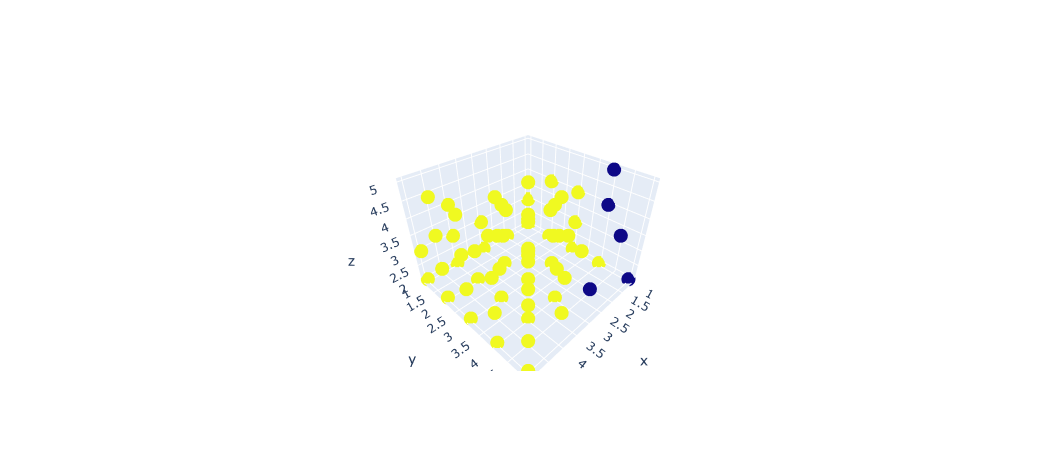

In [129]:
# RFM DBSCAN clustering - 3D plot

fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df_RFM['recency_score'], y = df_RFM['frequency_score'], z = df_RFM['monetary_score'],
                          mode = 'markers', marker = dict(color = DB_labels.astype(np.float)),
                          text = labels))

fig.show()

Looking to the graphs we can see that DBSCAN (at least with a few hyperparameters changed) performs very poorly with the RFM dataset.

### RFM DBSCAN Metrics

#### RFM - DBSCAN - Silouette Score

In [130]:
RFM_DB_SC = silhouette_score(df_RFM, DB_labels)
RFM_DB_SC

0.31744766808338937

#### RFM - DBSCAN - Davies Bouldin Index

In [131]:
RFM_DB_DBI = davies_bouldin_score(df_RFM, DB_labels)
RFM_DB_DBI

1.028502955788516

#### RFM - DBSCAN - Calinsk Harabasz Index

In [132]:
RFM_DB_CHI = calinski_harabasz_score(df_RFM, DB_labels)
RFM_DB_CHI

20.601734305348238

In [133]:
df_DBSCAN_metrics = pd.DataFrame([RFM_DB_SC, RFM_DB_DBI, RFM_DB_CHI]).T
df_DBSCAN_metrics.columns = ['silhouette_score', 'davies_bouldin_index', 'calinski_harabasz_index']
df_DBSCAN_metrics['Algorithm'] = 'DBSCAN'
df_DBSCAN_metrics = df_DBSCAN_metrics[['Algorithm', 'silhouette_score',	'davies_bouldin_index',	'calinski_harabasz_index']]
df_DBSCAN_metrics

Algorithm  silhouette_score  davies_bouldin_index  calinski_harabasz_index
0    DBSCAN              0.32                  1.03                    20.60

### Mean Shift  - df_RFM

In [134]:
RFM_MeanShift = MeanShift()

RFM_MeanShift.fit(df_RFM)
MS_labels = RFM_MeanShift.labels_

len(np.unique(MS_labels))

2

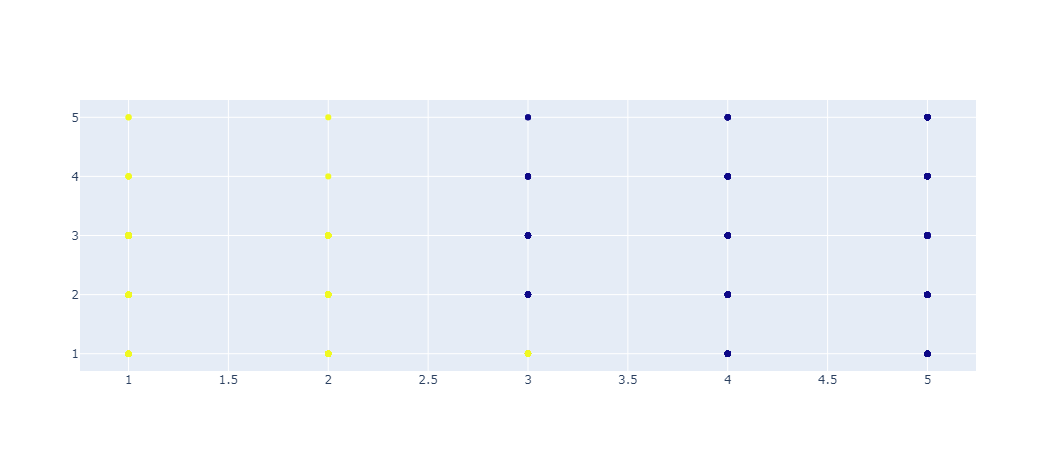

In [135]:
# RFM MeanShift clustering - 2D plot

fig = go.Figure()
fig.add_trace(go.Scatter(x = df_RFM['recency_score'], y = df_RFM['frequency_score'], mode = 'markers',
                         marker = dict(color = RFM_MeanShift.labels_.astype(np.float)), text = MS_labels))

fig.show()

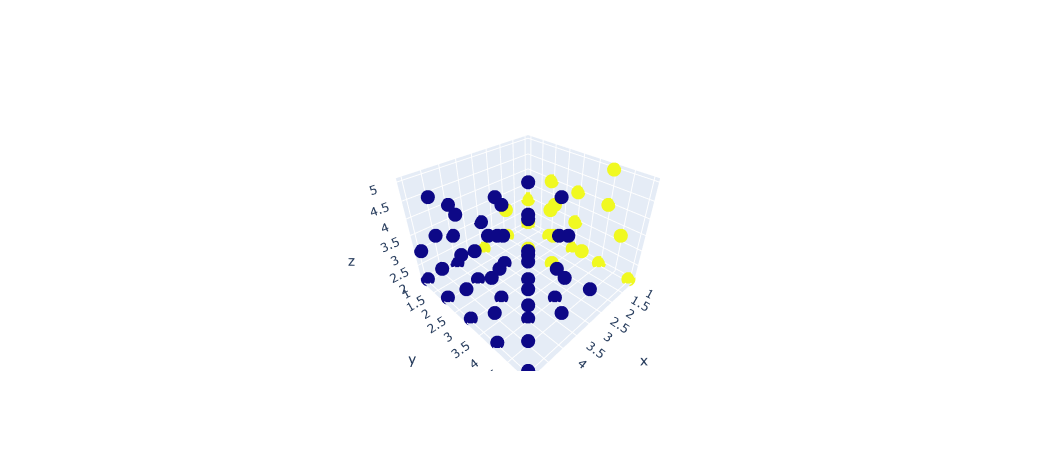

In [136]:
# RFM MeanShift clustering - 3D plot

fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df_RFM['recency_score'], y = df_RFM['frequency_score'], z = df_RFM['monetary_score'],
                          mode = 'markers', marker = dict(color = MS_labels.astype(np.float)),
                          text = MS_labels))

fig.show()

#### RFM - Mean Shift - Silhouette Score

In [137]:
RFM_MS_SC = silhouette_score(df_RFM, MS_labels)
RFM_MS_SC

0.5259642957356354

RFM - Mean Shift - Davies-Bouldin Index

In [138]:
RFM_MS_DBI = davies_bouldin_score(df_RFM, MS_labels)
RFM_MS_DBI

0.7062910853475868

#### RFM - Mean Shift - Calinski Harabasz Index

In [139]:
RFM_MS_CHI = calinski_harabasz_score(df_RFM, MS_labels)
RFM_MS_CHI

5874.210653161688

In [140]:
df_MeanShift_metrics = pd.DataFrame([RFM_MS_SC, RFM_MS_DBI, RFM_MS_CHI]).T
df_MeanShift_metrics.columns = ['silhouette_score', 'davies_bouldin_index', 'calinski_harabasz_index']
df_MeanShift_metrics['Algorithm'] = 'MeanShift'
df_MeanShift_metrics = df_MeanShift_metrics[['Algorithm', 'silhouette_score',	'davies_bouldin_index',	'calinski_harabasz_index']]
df_MeanShift_metrics

Algorithm  silhouette_score  davies_bouldin_index  calinski_harabasz_index
0  MeanShift              0.53                  0.71                  5874.21

#### RFM Models Comparison

In [141]:
RFM_comparison = pd.concat([df_KMeans_metrics_K2, df_DBSCAN_metrics, df_MeanShift_metrics])
                           
RFM_comparison.reset_index(drop = True, inplace = True)

In [142]:
RFM_comparison

Algorithm  silhouette_score  davies_bouldin_index  calinski_harabasz_index
0  KMeans (k = 2)              0.52                  0.73                  5932.68
1          DBSCAN              0.32                  1.03                    20.60
2       MeanShift              0.53                  0.71                  5874.21

In [143]:
print(f'Best Model by Metrics:\n\nSilhouette Score: \t {RFM_comparison["silhouette_score"].max():.3f}    - Algorithm: Mean Shift'
      f'\nDavies-Bouldin Index:\t {RFM_comparison["davies_bouldin_index"].min():.3f}    - Algorithm: Mean Shift'
      f'\nCalinski Harabasz Index: {RFM_comparison["calinski_harabasz_index"].max():.3f} - Algorithm: KMeans (K = 2)')

Best Model by Metrics:

Silhouette Score: 	 0.526    - Algorithm: Mean Shift
Davies-Bouldin Index:	 0.706    - Algorithm: Mean Shift
Calinski Harabasz Index: 5932.676 - Algorithm: KMeans (K = 2)


## Grouped Dataset by CustomerID (df_customer_scaled)

In [144]:
df_customer_scaled.head()

total_invoices total_spend total_itens_purchased Avg_spend_by_invoice last_purchase_(days)
0          -0.39       -0.23                 -0.24                -0.18                 2.31
1           0.40        0.29                  0.29                -0.05                -0.89
2          -0.28       -0.06                  0.26                 0.11                -0.17
3          -0.09       -0.05                 -0.10                -0.07                -0.73
4          -0.33       -0.19                 -0.20                -0.08                 2.16

## KMeans


### Model

In [145]:
# Finding best K

k_clusters = [i for i in range(2, 10)]

silhouette_score_values = []
silhouette_score_values2 = []

for k in k_clusters:
    df_customer_Kmeans = KMeans(n_clusters = k, random_state=42, init='random', n_init=10, max_iter=10)
    labels = df_customer_Kmeans.fit_predict(df_customer_scaled.values)
    silhouette_score_values.append(silhouette_score(df_customer_scaled, labels))
    silhouette_score_values2.append([k, silhouette_score(df_customer_scaled, labels)])

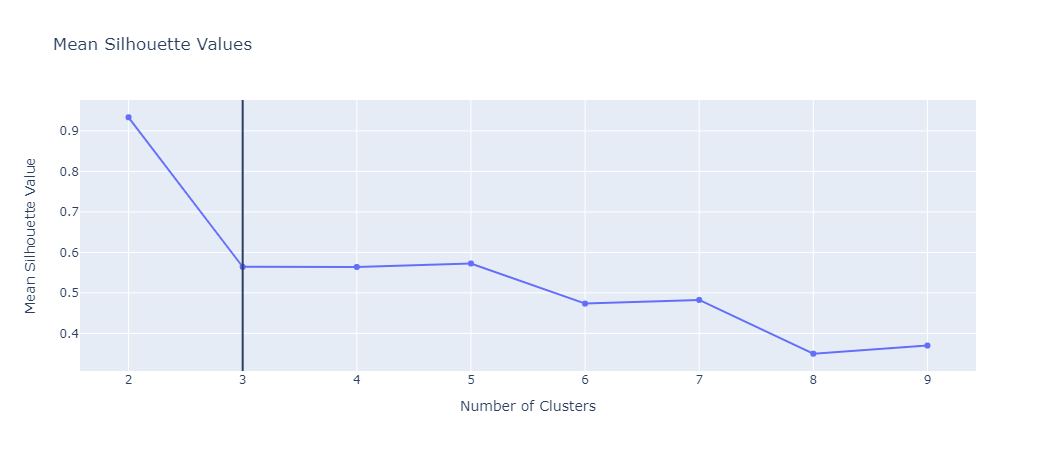

In [146]:
fig  = go.Figure()
fig.add_trace(go.Scatter(x = k_clusters, y = silhouette_score_values))

fig.update_layout(title = 'Mean Silhouette Values', xaxis_title = 'Number of Clusters', yaxis_title = 'Mean Silhouette Value')
fig.add_vline(x = 3)

fig.show()

In [147]:
# Best Silhouette Score value
df_customer_scaled_SC = pd.DataFrame(silhouette_score_values2, columns = ['K', 'silhouette_score'])
df_customer_scaled_SC.style.highlight_max(color = 'darkorange')

In [148]:
# Instancing model

k = 3

df_customer_Kmeans = KMeans(n_clusters = k, random_state=42, init='random', n_init=10, max_iter=300)
df_customer_Kmeans.fit(df_customer_scaled.values)
labels = df_customer_Kmeans.labels_

In [149]:
df_customer_2['clusters'] = df_customer_Kmeans.predict(df_customer_scaled)

In [150]:
df_customer_scaled['clusters'] = df_customer_Kmeans.predict(df_customer_scaled)

In [151]:
df_customer_scaled['clusters'].value_counts()

(clusters,)
0              3249
2              1098
1                15
dtype: int64

In [152]:
df_customer_2.head()

total_invoices  total_spend  total_itens_purchased  Avg_spend_by_invoice  last_purchase_(days)  clusters
1               2         0.00                      0                  0.00                   326         2
2             182      4310.00                   2458                 23.68                     3         0
3              27      1437.24                   2332                 53.23                    76         0
4              72      1457.55                    630                 20.24                    19         0
5              16       294.40                    196                 18.40                   311         2

<AxesSubplot:xlabel='total_invoices', ylabel='total_spend'>

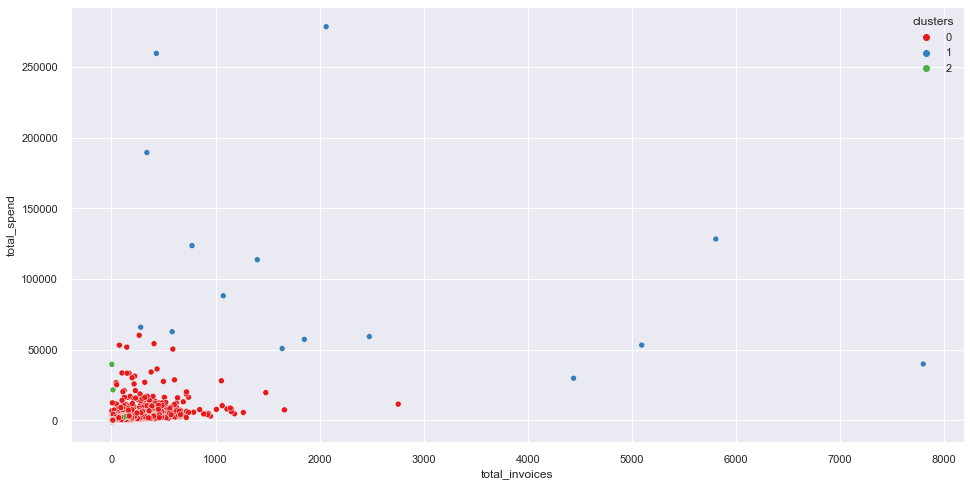

In [153]:
sns.scatterplot(x = 'total_invoices', y = 'total_spend', hue = 'clusters', data = df_customer_2, palette = sns.color_palette('Set1', 3))

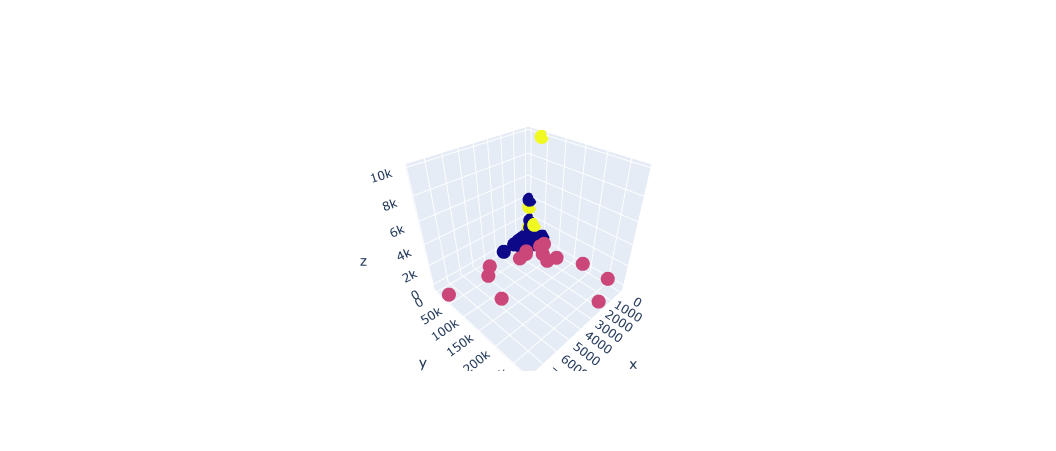

In [154]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df_customer_2['total_invoices'], y = df_customer_2['total_spend'], z = df_customer_2['Avg_spend_by_invoice'],
                          mode = 'markers', marker = dict(color = df_customer_Kmeans.labels_.astype(np.float)),
                          text = df_customer_Kmeans.labels_))

fig.show()

### Evaluation

For n_clusters = 2 The average silhouette_score is : 0.6649451941247166
For n_clusters = 3 The average silhouette_score is : 0.68791642235781
For n_clusters = 4 The average silhouette_score is : 0.6902438976210366
For n_clusters = 5 The average silhouette_score is : 0.6615078828857548
For n_clusters = 6 The average silhouette_score is : 0.6108704517217135


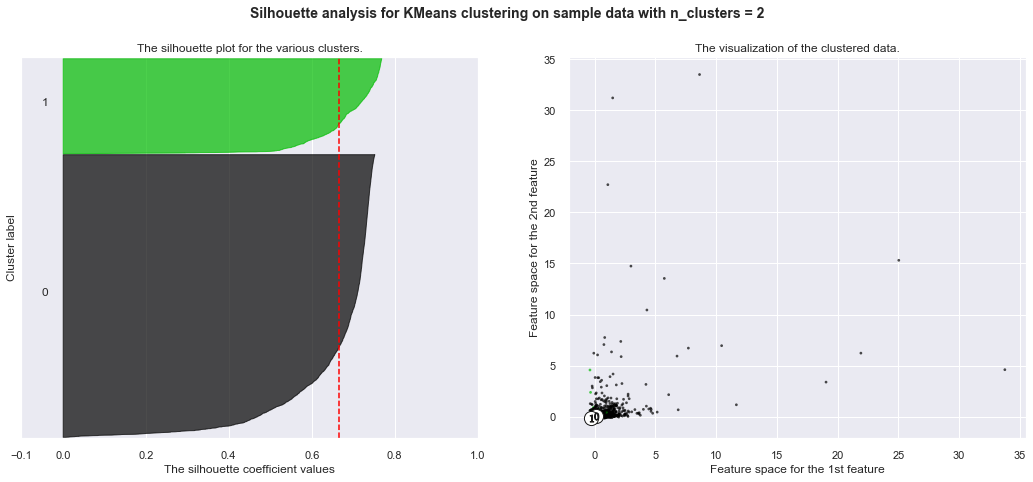

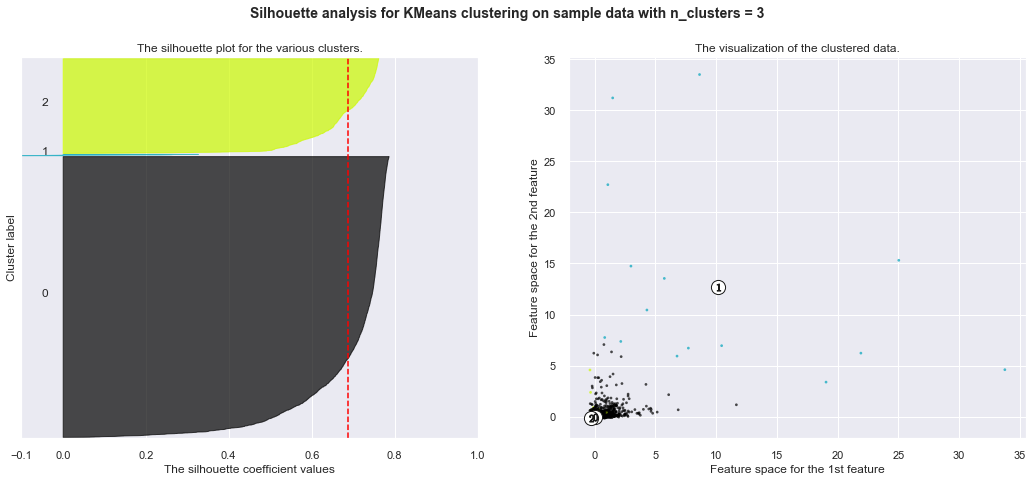

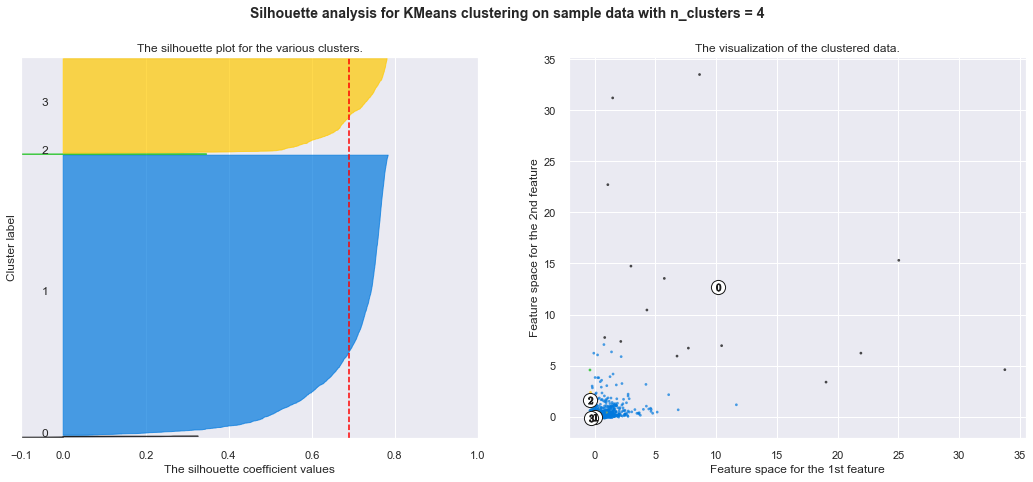

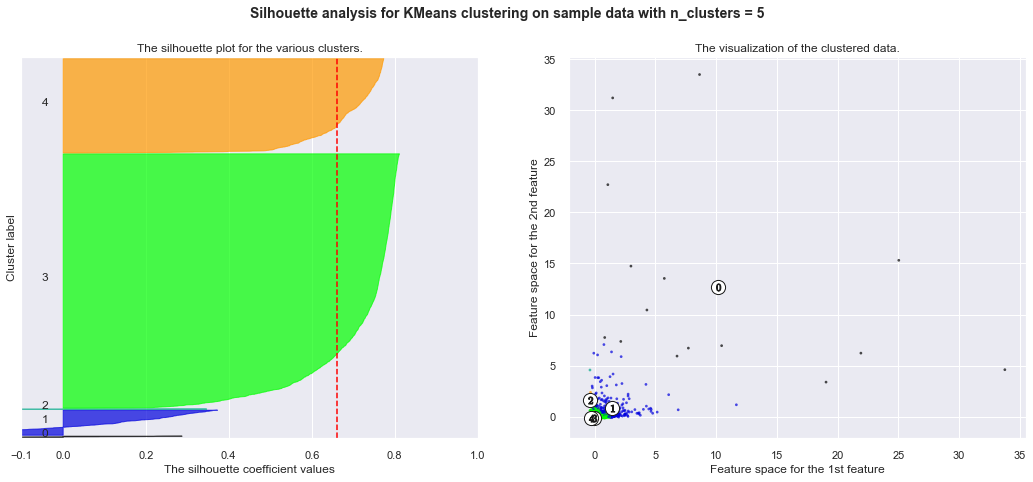

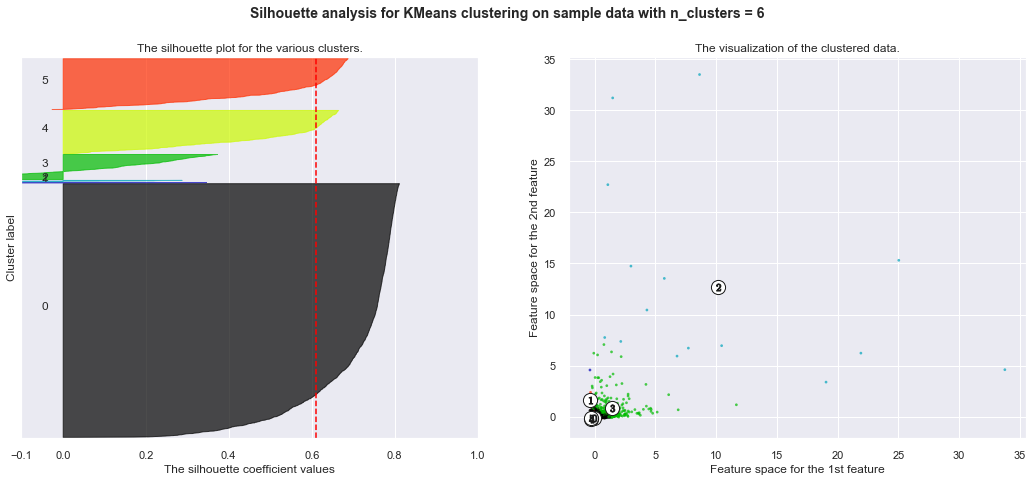

In [155]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_customer_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, init='random', n_init=10, max_iter=300)
    cluster_labels = clusterer.fit_predict(df_customer_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_customer_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_customer_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_customer_scaled.values[:, 0], df_customer_scaled.values[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [156]:
# WSS - Whitin-Cluster Sum of Square

print(f'WSS: {df_customer_Kmeans.inertia_}')

# Silhouette Score
print(f'SS: {silhouette_score(df_customer_scaled, df_customer_Kmeans.labels_)}')

# Davies-Bouldin Index
print(f'DBI: {davies_bouldin_score(df_customer_scaled, df_customer_Kmeans.labels_)}')

# Calinski Harabasz Index
print(f'CHI: {calinski_harabasz_score(df_customer_scaled, df_customer_Kmeans.labels_)}')

WSS: 11810.172283154267
SS: 0.68791642235781
DBI: 0.6996193541772828
CHI: 2451.8785275264304


In [157]:
# KMeans Evaluation 

df_kmeans_results = [{'Model': 'KMeans', 
                  'WSS': 11810.1722,
                  'silhouette_score': 0.6879,
                  'davies_bouldin': 0.6996,
                  'calinski_harabasz': 2451.8785}]

df_kmeans_eval = pd.DataFrame(df_kmeans_results)
df_kmeans_eval                                                   

Model      WSS  silhouette_score  davies_bouldin  calinski_harabasz
0  KMeans 11810.17              0.69            0.70            2451.88

### KMeans Cluster Report

In [158]:
df_customer['clusters'] = labels
df_customer.head()

CustomerID         Country  total_invoices  total_spend  total_itens_purchased  Avg_spend_by_invoice  last_purchase_(days)  clusters
1    12346.00  United Kingdom               2         0.00                      0                  0.00                   326         2
2    12347.00         Iceland             182      4310.00                   2458                 23.68                     3         0
3    12348.00         Finland              27      1437.24                   2332                 53.23                    76         0
4    12349.00           Italy              72      1457.55                    630                 20.24                    19         0
5    12350.00          Norway              16       294.40                    196                 18.40                   311         2

In [159]:
df_customer['total_itens_purchased'].max()

196555

In [160]:
# Number of Customers
df_insiders_report_KMeans = df_customer[['CustomerID','clusters']].groupby('clusters').count().reset_index()
df_insiders_report_KMeans['perc_customer'] = 100 * (df_insiders_report_KMeans['CustomerID'] / df_insiders_report_KMeans['CustomerID'].sum())

# AVG Total_Spend
df_insiders_report_KMeans['AVG_total_spend'] = df_customer[['total_spend', 'clusters']].groupby('clusters').mean()

# AVG total_invoices
df_insiders_report_KMeans['AVG_total_invoices'] = df_customer[['total_invoices', 'clusters']].groupby('clusters').mean()

# AVG last_purchase
df_insiders_report_KMeans['AVG_last_purchase'] = df_customer[['last_purchase_(days)', 'clusters']].groupby('clusters').mean()

# AVG total_itens_purchased
df_insiders_report_KMeans['AVG_total_itens_purchased'] = df_customer[['total_itens_purchased', 'clusters']].groupby('clusters').mean()

In [161]:
df_insiders_report_KMeans

clusters  CustomerID  perc_customer  AVG_total_spend  AVG_total_invoices  AVG_last_purchase  AVG_total_itens_purchased
0         0        3249          74.48          1879.35              102.71              40.68                    1132.48
1         1          15           0.34        106702.05             2404.00               5.13                   60238.00
2         2        1098          25.17           503.87               27.30             247.85                     264.65

### TSNE Visualization - KMeans

<AxesSubplot:>

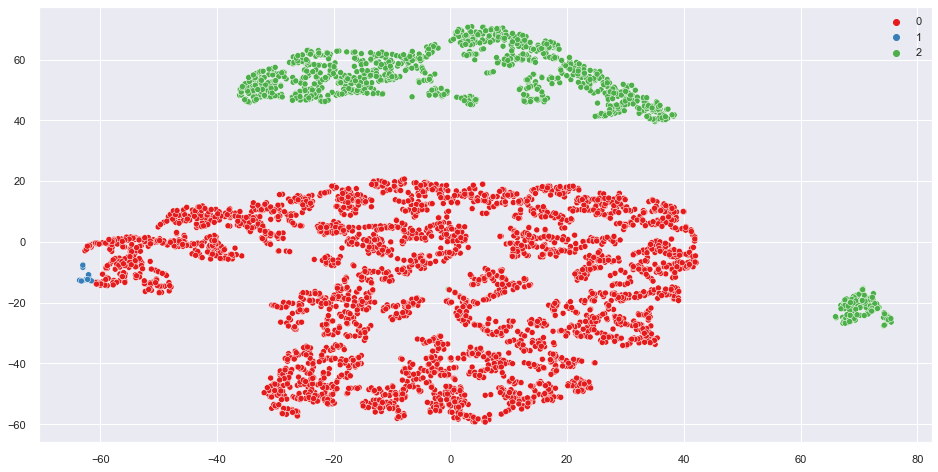

In [162]:
# TSNE - high-dimensional visualize data.

tsne = TSNE(perplexity=40)

visualization = tsne.fit_transform(X = df_customer_scaled)

sns.scatterplot(x = visualization[:,0], y = visualization[:,1], hue = df_customer_Kmeans.labels_, palette = sns.color_palette('Set1', 3))

## DBSCAN

### Model

In [163]:
dbscan_model = DBSCAN()
db_labels = dbscan_model.fit_predict(df_customer_scaled)

In [164]:
np.unique(db_labels)

array([-1,  0,  1,  2,  3], dtype=int64)

In [165]:
df_customer_db = df_customer.copy()

In [166]:
df_customer_db['clusters'] = db_labels
df_customer_db.head()

CustomerID         Country  total_invoices  total_spend  total_itens_purchased  Avg_spend_by_invoice  last_purchase_(days)  clusters
1    12346.00  United Kingdom               2         0.00                      0                  0.00                   326         0
2    12347.00         Iceland             182      4310.00                   2458                 23.68                     3         1
3    12348.00         Finland              27      1437.24                   2332                 53.23                    76         1
4    12349.00           Italy              72      1457.55                    630                 20.24                    19         1
5    12350.00          Norway              16       294.40                    196                 18.40                   311         0

<AxesSubplot:xlabel='total_invoices', ylabel='total_spend'>

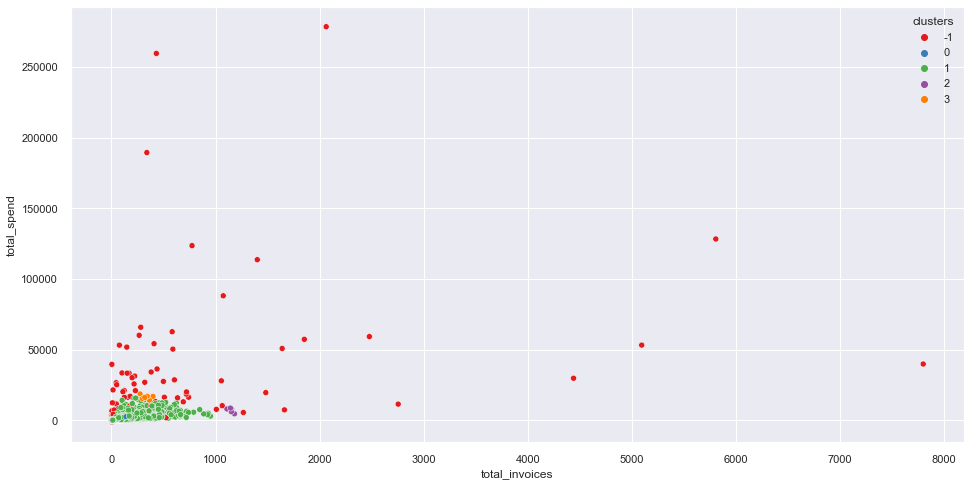

In [167]:
sns.scatterplot(x = 'total_invoices', y = 'total_spend', hue = 'clusters', data = df_customer_db, palette = sns.color_palette('Set1', 5))

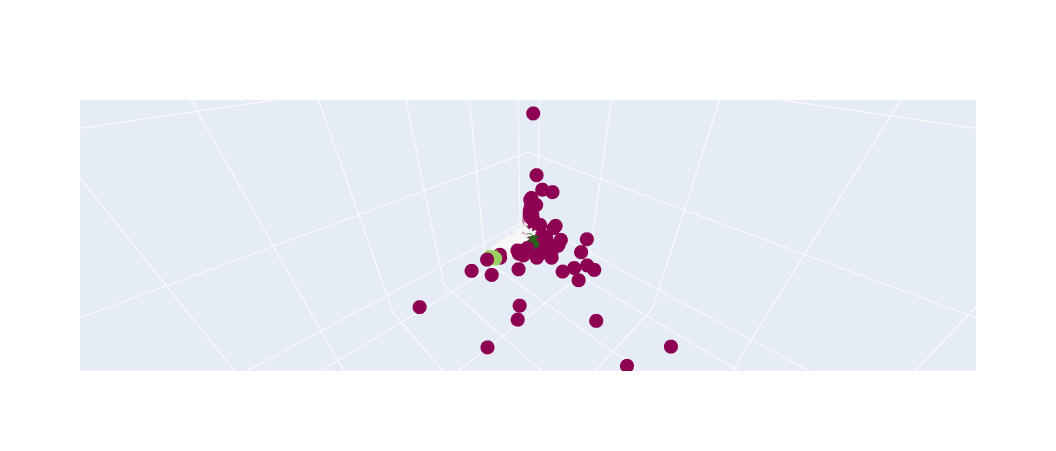

In [168]:
# 3D plot DBSCAN

fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df_customer_db['total_invoices'], y = df_customer_db['total_spend'], z = df_customer_db['Avg_spend_by_invoice'],
                          mode = 'markers', marker = dict(color = db_labels.astype(np.float)),
                          text = db_labels))

fig.show()

In [169]:
# Fine Tunning DBSCAN

dbscan_model_tunned = DBSCAN(eps = 1.4, min_samples = 15)
db_labels_tunned = dbscan_model_tunned.fit_predict(df_customer_scaled)
np.unique(db_labels_tunned)

array([-1,  0,  1], dtype=int64)

In [170]:
# WSS - Whitin-Cluster Sum of Square

#print(f'WSS: {dbscan_model.inertia_}')

# Silhouette Score
print(f'SS: {silhouette_score(df_customer_scaled, dbscan_model_tunned.labels_)}')

# Davies-Bouldin Index
print(f'DBI: {davies_bouldin_score(df_customer_scaled, dbscan_model_tunned.labels_)}')

# Calinski Harabasz Index
print(f'CHI: {calinski_harabasz_score(df_customer_scaled, dbscan_model_tunned.labels_)}')

SS: 0.6974237642096339
DBI: 1.1762950705430326
CHI: 1856.5241114542703


In [171]:
df_customer_db_tunned = df_customer.copy()
df_customer_db_tunned['clusters'] = db_labels_tunned
df_customer_db_tunned.head()

CustomerID         Country  total_invoices  total_spend  total_itens_purchased  Avg_spend_by_invoice  last_purchase_(days)  clusters
1    12346.00  United Kingdom               2         0.00                      0                  0.00                   326         0
2    12347.00         Iceland             182      4310.00                   2458                 23.68                     3         1
3    12348.00         Finland              27      1437.24                   2332                 53.23                    76         1
4    12349.00           Italy              72      1457.55                    630                 20.24                    19         1
5    12350.00          Norway              16       294.40                    196                 18.40                   311         0

<AxesSubplot:xlabel='total_invoices', ylabel='total_spend'>

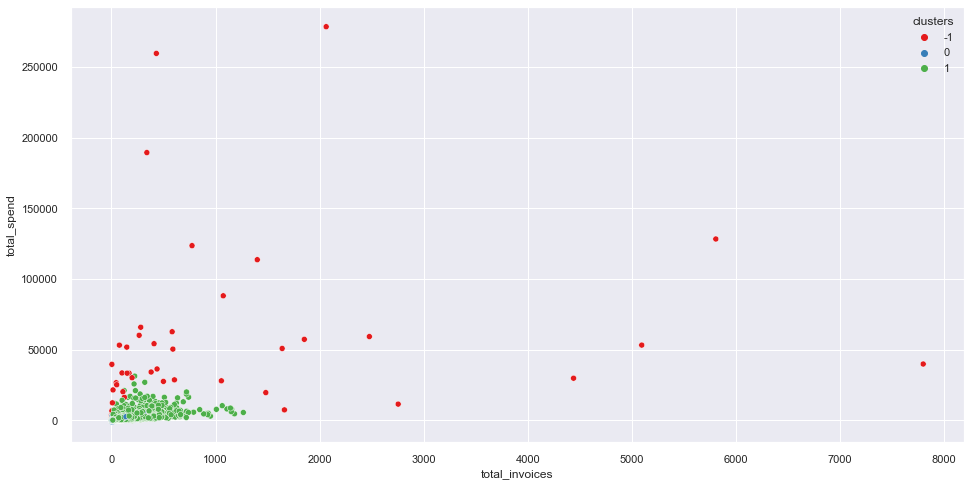

In [172]:
sns.color_palette("Paired")
sns.scatterplot(x = 'total_invoices', y = 'total_spend', hue = 'clusters', data = df_customer_db_tunned, palette = sns.color_palette('Set1', 3))

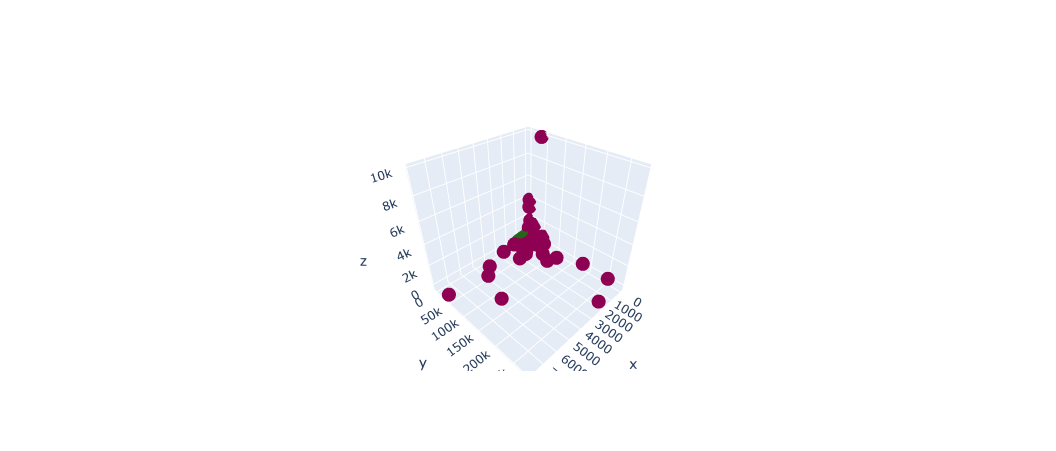

In [173]:
# 3D plot DBSCAN

fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df_customer_db_tunned['total_invoices'], y = df_customer_db_tunned['total_spend'], z = df_customer_db_tunned['Avg_spend_by_invoice'],
                          mode = 'markers', marker = dict(color = db_labels_tunned.astype(np.float)),
                          text = db_labels_tunned))

fig.show()

### Evaluation

In [174]:
# WSS - Whitin-Cluster Sum of Square

#print(f'WSS: {dbscan_model.inertia_}')

# Silhouette Score
print(f'SS: {silhouette_score(df_customer_scaled, dbscan_model.labels_)}')

# Davies-Bouldin Index
print(f'DBI: {davies_bouldin_score(df_customer_scaled, dbscan_model.labels_)}')

# Calinski Harabasz Index
print(f'CHI: {calinski_harabasz_score(df_customer_scaled, dbscan_model.labels_)}')

SS: 0.6452333348160444
DBI: 1.8773186911689401
CHI: 692.4466251961807


In [175]:
eps = [0.4, 0.6, 0.8, 1, 1.2, 1.4]
min_samples = [15, 20, 30, 40, 50]
SS_list = []
DBI_list = []
CH_list = []



for e in eps:
    for s in min_samples:
        dbscan_model = DBSCAN(eps = e, min_samples = s, n_jobs = -1)
        db_labels = dbscan_model.fit_predict(df_customer_scaled)
        SS_list.append([e, s, silhouette_score(df_customer_scaled, db_labels)])
        DBI_list.append([e, s, davies_bouldin_score(df_customer_scaled, db_labels)])
        CH_list.append([e, s, calinski_harabasz_score(df_customer_scaled, db_labels)])

In [176]:
df_dbscan_ss = pd.DataFrame(SS_list, columns = ['eps', 'min_samples', 'silhouette_score'])

df_dbscan_dbi = pd.DataFrame(DBI_list, columns = ['eps', 'min_samples', 'davies_bouldin_index'])

df_dbscan_ch = pd.DataFrame(CH_list, columns = ['eps', 'min_samples', 'calisnki_harabasz'])

df_dbscan_search = pd.merge(df_dbscan_ss, df_dbscan_dbi, how = 'left', on = ['eps', 'min_samples'])

df_dbscan_search = pd.merge(df_dbscan_search, df_dbscan_ch, how = 'left', on = ['eps', 'min_samples'])

In [177]:
df_dbscan_search.iloc[[10, 15, 20, 25]]

eps  min_samples  silhouette_score  davies_bouldin_index  calisnki_harabasz
10 0.80           15              0.70                  1.38            1463.37
15 1.00           15              0.70                  1.30            1621.35
20 1.20           15              0.70                  1.19            1809.80
25 1.40           15              0.70                  1.18            1856.52

### DBSCAN Clusters Report

In [178]:
df_customer_db_tunned.head()

CustomerID         Country  total_invoices  total_spend  total_itens_purchased  Avg_spend_by_invoice  last_purchase_(days)  clusters
1    12346.00  United Kingdom               2         0.00                      0                  0.00                   326         0
2    12347.00         Iceland             182      4310.00                   2458                 23.68                     3         1
3    12348.00         Finland              27      1437.24                   2332                 53.23                    76         1
4    12349.00           Italy              72      1457.55                    630                 20.24                    19         1
5    12350.00          Norway              16       294.40                    196                 18.40                   311         0

In [179]:
# Number of Customers
df_insiders_report_dbscan = df_customer_db_tunned[['CustomerID','clusters']].groupby('clusters').count().reset_index()
df_insiders_report_dbscan['perc_customer'] = 100 * (df_insiders_report_dbscan['CustomerID'] / df_insiders_report_dbscan['CustomerID'].sum())

# AVG Total_Spend
df_insiders_report_dbscan['AVG_total_spend'] = df_customer_db_tunned[['total_spend', 'clusters']].groupby('clusters').mean().reset_index()['total_spend']

# AVG total_invoices
df_insiders_report_dbscan['AVG_total_invoices'] = df_customer_db_tunned[['total_invoices', 'clusters']].groupby('clusters').mean().reset_index()['total_invoices']

# AVG last_purchase
df_insiders_report_dbscan['AVG_last_purchase'] = df_customer_db_tunned[['last_purchase_(days)', 'clusters']].groupby('clusters').mean().reset_index()['last_purchase_(days)']

# AVG total_itens_purchased
df_insiders_report_dbscan['AVG_total_itens_purchased'] = df_customer_db_tunned[['total_itens_purchased', 'clusters']].groupby('clusters').mean().reset_index()['total_itens_purchased']

In [180]:
df_insiders_report_dbscan

clusters  CustomerID  perc_customer  AVG_total_spend  AVG_total_invoices  AVG_last_purchase  AVG_total_itens_purchased
0        -1          48           1.10         49805.42              988.56              36.94                   29019.60
1         0        1092          25.03           443.75               27.43             247.99                     247.74
2         1        3222          73.87          1671.18              100.04              40.91                     996.31

### TSNE Visualization - DBSCAN

In [181]:
# TSNE - high-dimensional visualize data.

tsne = TSNE(perplexity=40)

visualization = tsne.fit_transform(X = df_customer_scaled)

sns.scatterplot(x = visualization[:,0], y = visualization[:,1], hue = db_labels_tunned, palette = sns.color_palette('Set1', 3))

<AxesSubplot:>

## Mean Shift


### Model 

In [182]:
mean_shift_model = MeanShift()  
mean_shift_model.fit(df_customer_scaled)

np.unique(mean_shift_model.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], dtype=int64)

In [183]:
len(np.unique(mean_shift_model.labels_))

45

In [184]:
# Estimate Bandwidth

BW = estimate_bandwidth(df_customer_scaled)
mean_shift_model_bw = MeanShift(BW)  
mean_shift_model_bw.fit(df_customer_scaled)

np.unique(mean_shift_model.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], dtype=int64)

In [185]:
# Best Estimate Bandwidth Quantile
'''
quantil_range = np.linspace(0.02, 0.5, 30)

silhouette_values = []
quantil_plot = []

for quantil in quantil_range:
    BW = estimate_bandwidth(df_customer_scaled, quantile = quantil)
    mean_shift_model_bw = MeanShift(BW)
    ms_labels = mean_shift_model_bw.fit_predict(df_customer_scaled)
    
    if (len(np.unique(labels)) < len(df_customer_scaled) and len(np.unique(labels)) > 1):
        mean_silhouette = silhouette_score(df_customer_scaled, ms_labels)
        silhouette_values.append(mean_silhouette)
        quantil_plot.append(quantil)
'''

'\nquantil_range = np.linspace(0.02, 0.5, 30)\n\nsilhouette_values = []\nquantil_plot = []\n\nfor quantil in quantil_range:\n    BW = estimate_bandwidth(df_customer_scaled, quantile = quantil)\n    mean_shift_model_bw = MeanShift(BW)\n    ms_labels = mean_shift_model_bw.fit_predict(df_customer_scaled)\n    \n    if (len(np.unique(labels)) < len(df_customer_scaled) and len(np.unique(labels)) > 1):\n        mean_silhouette = silhouette_score(df_customer_scaled, ms_labels)\n        silhouette_values.append(mean_silhouette)\n        quantil_plot.append(quantil)\n'

In [186]:
# Saving Best Estimate bandwidth Quantile Results

silhouette_values = [0.2819196002607263, 0.31746314194166314, 0.36512150006793104, 0.35925166402890873, 0.3019558512564802, 0.32983184470288435, 0.41816892914579706, 0.45848076543493893,
                     0.450106499806145, 0.4750346781789088, 0.5420544963823462, 0.6141255264360194, 0.6179733701433662, 0.650400253730069, 0.6561578641983468, 0.6557600404188438,
                     0.669449884095739, 0.6702749901170809, 0.6726847407019259, 0.6726847407019259, 0.6726847407019259, 0.6726847407019259, 0.6726847407019259, 0.6708050478251532,
                     0.6708050478251532, 0.6708050478251532, 0.6739858648114517, 0.6739858648114517, 0.6817991822214734, 0.681861958933829]

quantil_plot = [0.02, 0.036551724137931035, 0.05310344827586207, 0.06965517241379311, 0.08620689655172414, 0.10275862068965518, 0.11931034482758622, 0.13586206896551725, 0.15241379310344827,
                0.16896551724137931, 0.18551724137931033, 0.20206896551724138, 0.21862068965517242, 0.23517241379310344, 0.2517241379310345, 0.26827586206896553, 0.2848275862068966,
                0.3013793103448276, 0.31793103448275867, 0.33448275862068966, 0.3510344827586207, 0.36758620689655175, 0.3841379310344828, 0.40068965517241384, 0.4172413793103449,
                0.4337931034482759, 0.4503448275862069, 0.46689655172413796, 0.483448275862069, 0.5]

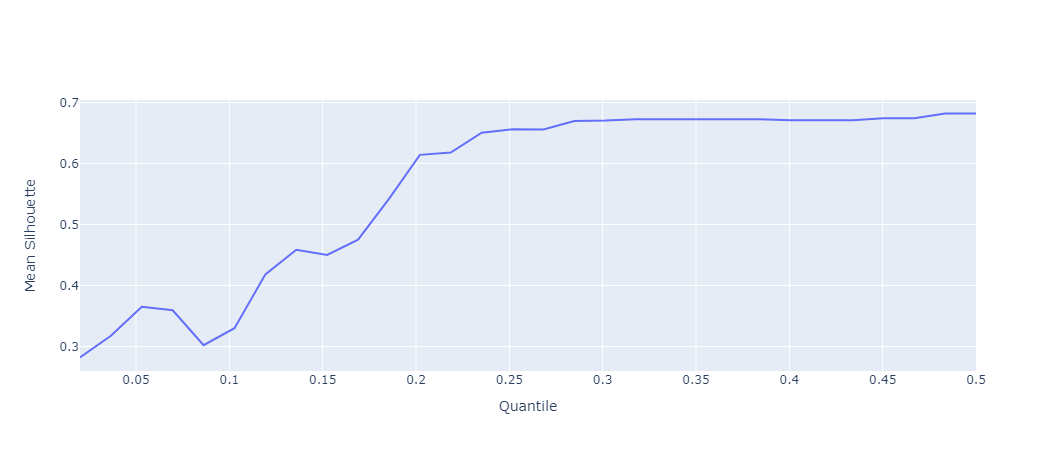

In [187]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = quantil_plot, y = silhouette_values))

fig.update_layout(dict(xaxis_title = 'Quantile', yaxis_title = 'Mean Silhouette'))

fig.show()

In [188]:
np.unique(mean_shift_model.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], dtype=int64)

In [189]:
# Estimate Bandwidth

BW = estimate_bandwidth(df_customer_scaled, quantile = 0.5)
mean_shift_model_bw = MeanShift(BW)  
mean_shift_model_bw.fit(df_customer_scaled)

ms_predict = mean_shift_model_bw.predict(df_customer_scaled)

np.unique(mean_shift_model_bw.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39], dtype=int64)

### Evaluation

In [190]:
# Means Shift Metrics

# Silhouette Score
print(f'SS: {silhouette_score(df_customer_scaled, mean_shift_model_bw.labels_)}')

# Davies-Bouldin Index
print(f'DBI: {davies_bouldin_score(df_customer_scaled, mean_shift_model_bw.labels_)}')

# Calinski Harabasz Index
print(f'CHI: {calinski_harabasz_score(df_customer_scaled, mean_shift_model_bw.labels_)}')

SS: 0.681861958933829
DBI: 0.42822645348886895
CHI: 1077.662821280248


NameError: name 'model' is not defined

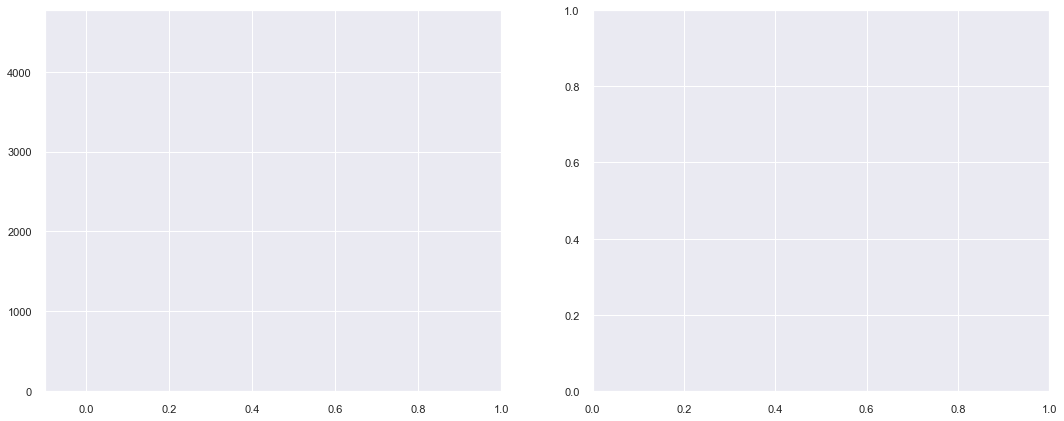

In [191]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(df_customer_scaled) + (len(np.unique(mean_shift_model_bw.labels_)) + 1) * 10])

silhouette_avg = silhouette_score(df_customer_scaled, mean_shift_model_bw.fit_predict(df_customer_scaled))
print(f"For n_clusters = {len(np.unique(mean_shift_model_bw.labels_))}.\n\nThe average silhouette_score is : {silhouette_avg}.")

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df_customer_scaled, mean_shift_model_bw.fit_predict(df_customer_scaled))

y_lower = 10
for i in range(len(np.unique(mean_shift_model_bw.labels_))):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / len(np.unique(mean_shift_model_bw.labels_)))
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(mean_shift_model_bw.fit_predict(df_customer_scaled).astype(float) / len(np.unique(mean_shift_model_bw.labels_)))
ax2.scatter(df_customer_scaled.values[:, 0], df_customer_scaled.values[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

# Labeling the clusters
centers = mean_shift_model_bw.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle((f"Silhouette analysis for Mean Shift clustering. (n_clusters = {len(np.unique(mean_shift_model_bw.labels_))})"),fontsize=14, fontweight='bold')

plt.show()

### Mean Shift Clusters Report

In [ ]:
df_mean_shift = df_customer_db_tunned.copy()
df_mean_shift['clusters'] = mean_shift_model.fit_predict(df_customer_scaled)

In [ ]:
# Number of Customers
df_insiders_report_mean_shift = df_mean_shift[['CustomerID','clusters']].groupby('clusters').count().reset_index()
df_insiders_report_mean_shift['perc_customer'] = 100 * (df_insiders_report_mean_shift['CustomerID'] / df_insiders_report_mean_shift['CustomerID'].sum())

# AVG Total_Spend
df_insiders_report_mean_shift['AVG_total_spend'] = df_mean_shift[['total_spend', 'clusters']].groupby('clusters').mean().reset_index()['total_spend']

# AVG total_invoices
df_insiders_report_mean_shift['AVG_total_invoices'] = df_mean_shift[['total_invoices', 'clusters']].groupby('clusters').mean().reset_index()['total_invoices']

# AVG last_purchase
df_insiders_report_mean_shift['AVG_last_purchase'] = df_mean_shift[['last_purchase_(days)', 'clusters']].groupby('clusters').mean().reset_index()['last_purchase_(days)']

# AVG total_itens_purchased
df_insiders_report_mean_shift['AVG_total_itens_purchased'] = df_mean_shift[['total_itens_purchased', 'clusters']].groupby('clusters').mean().reset_index()['total_itens_purchased']

In [ ]:
df_insiders_report_mean_shift

### TSNE Visualization - Mean Shift

In [ ]:
# TSNE - high-dimensional visualize data.

tsne = TSNE(perplexity=40)

visualization = tsne.fit_transform(X = df_customer_scaled)

sns.scatterplot(x = visualization[:,0], y = visualization[:,1], hue = mean_shift_model.labels_, palette = sns.color_palette('Set1', 45))

# Best Model

In [ ]:
evaluation_dict = [
    {
        'Model':'KMeans', 'Number of cluesters': len(df_insiders_report_KMeans["clusters"]), 'Mean Silhouette Score':  silhouette_score(df_customer_scaled, df_customer_Kmeans.labels_),
        'Davies-Boudin Index': davies_bouldin_score(df_customer_scaled, df_customer_Kmeans.labels_), 'Calinski Harabasz Index': calinski_harabasz_score(df_customer_scaled, df_customer_Kmeans.labels_)
    },
    {
        'Model': 'DBSCAN', 'Number of cluesters': len(df_insiders_report_dbscan["clusters"]), 'Mean Silhouette Score':   silhouette_score(df_customer_scaled, dbscan_model.labels_),
        'Davies-Boudin Index': davies_bouldin_score(df_customer_scaled, dbscan_model.labels_), 'Calinski Harabasz Index': calinski_harabasz_score(df_customer_scaled, dbscan_model.labels_)
    },
    {
        'Model': 'Mean Shift', 'Number of cluesters': len(df_insiders_report_mean_shift["clusters"]), 'Mean Silhouette Score': silhouette_score(df_customer_scaled, mean_shift_model_bw.labels_),
        'Davies-Boudin Index': davies_bouldin_score(df_customer_scaled, mean_shift_model_bw.labels_), 'Calinski Harabasz Index': calinski_harabasz_score(df_customer_scaled, mean_shift_model_bw.labels_)
    }
]

df_model_evaluation = pd.DataFrame(evaluation_dict)

In [ ]:
df_model_evaluation

In [ ]:
# kmeans, DBSCAN, Mean Shift clusters descriptionf

display(df_insiders_report_KMeans, '-'*105)
display(df_insiders_report_dbscan, '-'*105)
display(df_insiders_report_mean_shift, '-'*105)

# Cluster Analysis

# Deploy to Production

# Work Diary

30/03/2021 - Kick off PA05.

    - done data load.
    - done first look at the data.
    - done some data cleaning.
        - found some issues with NaN in the data.
        
            - InvoiceNo.
            - CustomerID.
            - Description.
            

31/03/2021 - Git config + ClientID NaN problem.

    - Done GitLab configurations.
    - Openned my branch at GitLab repo.
    
    - Try to figure out how to use the NaN CustomerID - I do not want to drop them.
        - had an idea - use the Invoice Number to relate the purchases with the NaN clients, so we can input a clientID for each Invoice Number.
            - We can input the new CustomerID numbers above the CustomerID.max() - 18287.0 - but it can also create fake clients.
            - (01/04 - After some analysis, it was understood that the NaN values at the columns CustomerID and Description are not relevant for the future clustering model training. 
            It was decided to mantein the rows with NaN values.

01/04/2021 - More Data Cleaning.

    - Solved the "InvoiceNo" issue.

02/04/2021 - Finished first cicle of Data Cleaning.

    - Found a lot of data that did not correspond to sales itself.
    - Found some data as shipping charges, taxes, postage... They were all excluded, i tried to maintain only actual sales at the dataset.

06/04/2021 - returned to data cleaning.

    - Weekly 01 - After some considerations was observed that negative sales quantities are actually devolutions, and this data is important. I've returned them to the dataset.
    - the notebook "c1.0-fdv-end-to-end-clustering-W1" was duplicated in order to mantein the previous work. It meybe useful.

07/04/2021 - Still data cleaning.

    - Done some notebook organization.
    - Returned the negative sales quantityes back to the dataset.

10/04/2021 - Feature Enginnering

    - Done some feature enginnering.
    - Builded RFM model.

12/04/2021 - EDA

    - Back to EDA.
    - Done some graphs.
    - Discovered that there are no Fridays in the dataset.     

13/04/2021 - EDA

    - Done some more EDA.
    - I found that there are no Fridays in the data set.
    
    - Weekly 2 - Clustering Metrics.
        - Find best K for kmeans - Yellowbrick Method.
        - WSS.
        - Silhouette Score.

17/04/2021 - Some modeling tests

    - Done some modeling tests into RFM dataset - KMEans, DBSCAN.
    - Done metrics evaluation.

18/04/2021 - RFM Models Evaluation

    - Done some metrics evaluation on RFM Models (kMeans, DBSCAN, Mean Shift).
    - Accordingly to the metrics evaluarion, the best model to use on RFM dataset (with no fine tunning) is Mean Shift, it has the best Silhouette Score and Davies-Boulding Index and the secon best Calinski Harabasz Index.
    
    - From now on I'll use the original dataset (prepared).

19/04/2021 - Done some Feature Enginnering

    - Created df_customer - df grouped by customer.
    
 
19/04/2021 - Done Some Data Preparation.

    - Done StandardScaler with df_customer dataset.
    - Done some tests with KMeans.

20/04/2021 - Weekly 3

    - Finished KMeans on clustomer dataset
    
|   cluster |   total_clients |   percentage |   AVG_total_spend |   AVG_total_invoices |   AVG_last_purchase |   AVG_total_itens_purchased |
|-----------:|-------------:|----------------:|------------------:|---------------------:|--------------------:|----------------------------:|
|          0 |         3249 |       74.4842   |          1879.35  |             102.707  |            40.6811  |                    1132.48  |
|          1 |           15 |        0.343879 |        106702     |            2404      |             5.13333 |                   60238     |
|          2 |         1098 |       25.1719   |           503.867 |              27.3005 |           247.852   |                     264.652 |

21/04/2021 - DBSCAN

    - Done some tests with DBSCAN algorithm.

22 - 23/04/2021 - Means Shift + TSNE

24/04/2021 - Final Model Evaluation.

    - Done models evaluation
|    | Model   |   Number of cluesters |   Mean Silhouette Score |   Davies-Boudin Index |   Calinski Harabasz Index |
|---:|:--------|----------------------:|------------------------:|----------------------:|--------------------------:|
|  0 | KMeans  |                     3 |                0.687916 |              0.699619 |                   2451.88 |
|  1 | DBSCAN  |                     3 |                0.697424 |              1.1763   |                   1856.52 |
|  2 | Mean Shift  |                    45 |                0.681862 |              0.428226 |                   1077.66 |

    - KMeans with n_clusters = 3 was chose as the best model to use in this case.